In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.lines import Line2D

all_data_df =[]

In [2]:
#reading in the state abbreviations
path = '../statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.head(20)

State  Abbrev Code
0                Alabama    Ala.   AL
1                 Alaska  Alaska   AK
2                Arizona   Ariz.   AZ
3               Arkansas    Ark.   AR
4             California  Calif.   CA
5               Colorado   Colo.   CO
6            Connecticut   Conn.   CT
7               Delaware    Del.   DE
8   District of Columbia    D.C.   DC
9                Florida    Fla.   FL
10               Georgia     Ga.   GA
11                Hawaii  Hawaii   HI
12                 Idaho   Idaho   ID
13              Illinois    Ill.   IL
14               Indiana    Ind.   IN
15                  Iowa    Iowa   IA
16                Kansas   Kans.   KS
17              Kentucky     Ky.   KY
18             Louisiana     La.   LA
19                 Maine   Maine   ME

In [3]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [4]:
#list for state names
state_names = [x for x in statesAbbrev_df['State']]
len(state_names)

51

In [5]:
#creating a df dict to hold the state dfs, reading in the dfs
states_df_dict = {}
for x in range(10, 20):
    path = f'../states_data/US-{state_codes[x]}_cat_data.csv'
    states_df_dict[f'{state_codes[x]}_data_df'] = [pd.read_csv(path)]
states_df_dict

{'GA_data_df': [           time  arts_entertainment  autos  beauty_fitness  books_lit  \
  0    2019-01-06                  85     68              83         72   
  1    2019-01-13                  85     71              88         85   
  2    2019-01-20                  85     73              85         82   
  3    2019-01-27                  89     75              87         85   
  4    2019-02-03                  83     73              83         80   
  ..          ...                 ...    ...             ...        ...   
  98   2020-11-22                  77     70              78         53   
  99   2020-11-29                  79     75              84         66   
  100  2020-12-06                  84     75              88         67   
  101  2020-12-13                  83     76              83         65   
  102  2020-12-20                  87     74              89         53   
  
       action_adventure  campaigns_elections  celebs  discrimination  \
  0        

In [6]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['GA_data_df', 'HI_data_df', 'ID_data_df', 'IL_data_df', 'IN_data_df', 'IA_data_df', 'KS_data_df', 'KY_data_df', 'LA_data_df', 'ME_data_df'])

In [7]:
col_names = list(states_df_dict[f'{state_codes[10]}_data_df'][0].columns)
len(col_names)

25

In [8]:
col_names_for_max = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]
len(col_names_for_max)

21

In [9]:
times_list = list(states_df_dict[f'{state_codes[10]}_data_df'][0]['time'])
len(times_list)

103

In [10]:
covid_cases = list(states_df_dict[f'{state_codes[12]}_data_df'][0]['covid_cases'])
len(covid_cases)

103

In [11]:
def tvfilm_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['action_adventure'], color='red', label='Action/Adventure')

    ax.plot(graphs_time_list, data_2020_df['scifi_fantasy'], color='orange', label='SciFi Fantasy')

    ax.plot(graphs_time_list, data_2020_df['tv_shows'], color='purple', label='TV Shows')

    ax.plot(graphs_time_list, data_2020_df['online_vids'], color='green', label='Online Video')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group TV/Film vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay At Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_TVFilm/{state_names[ind_no]}.png') 
    plt.show()

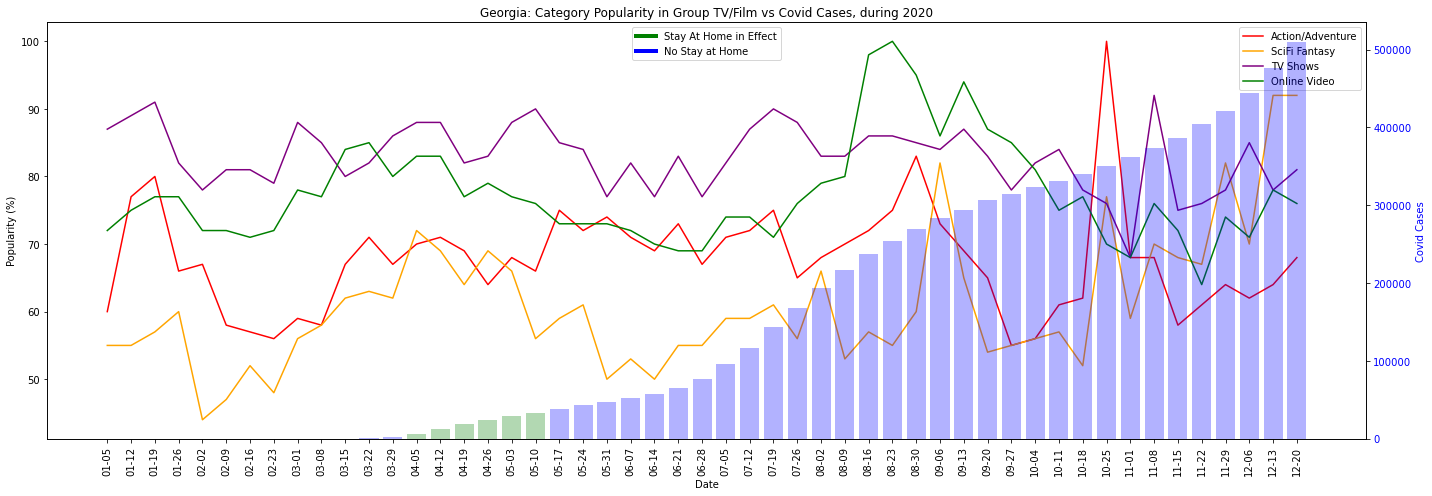

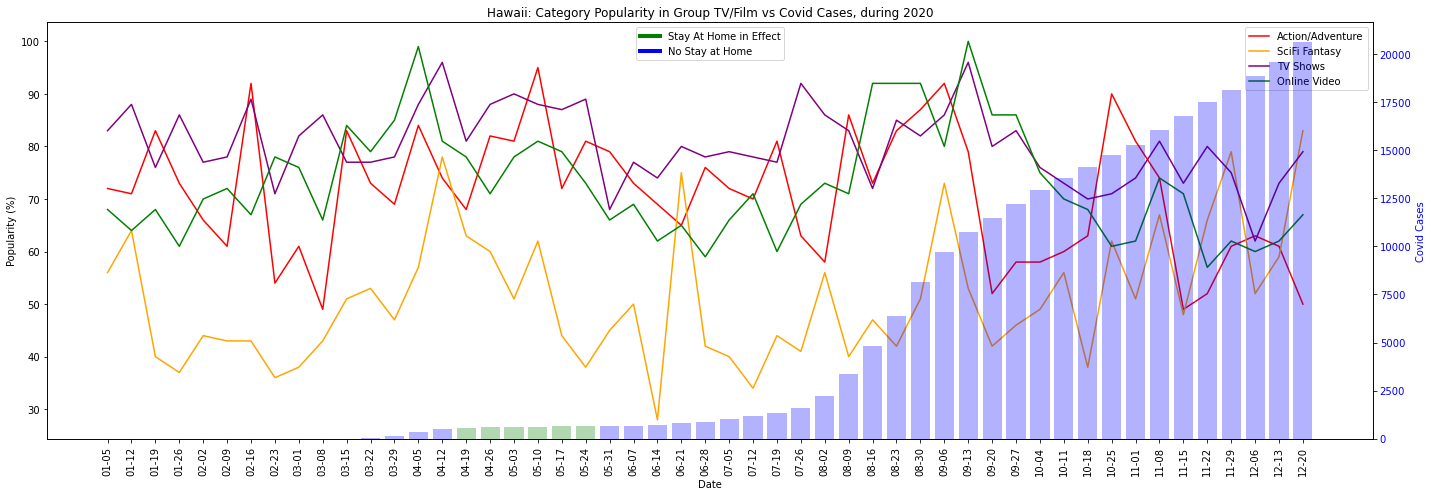

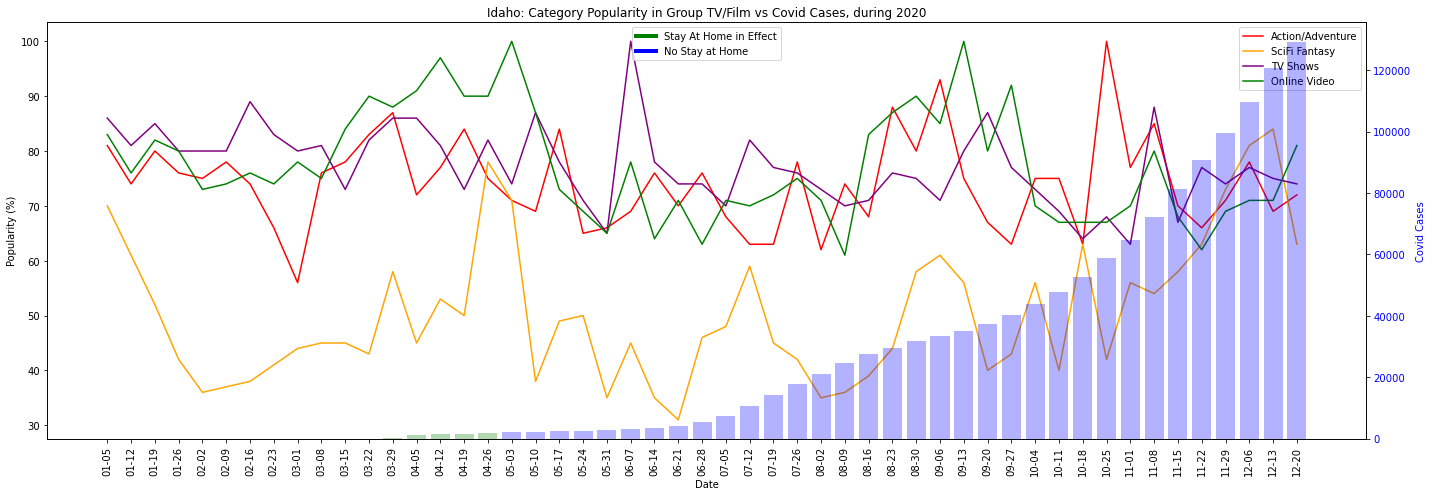

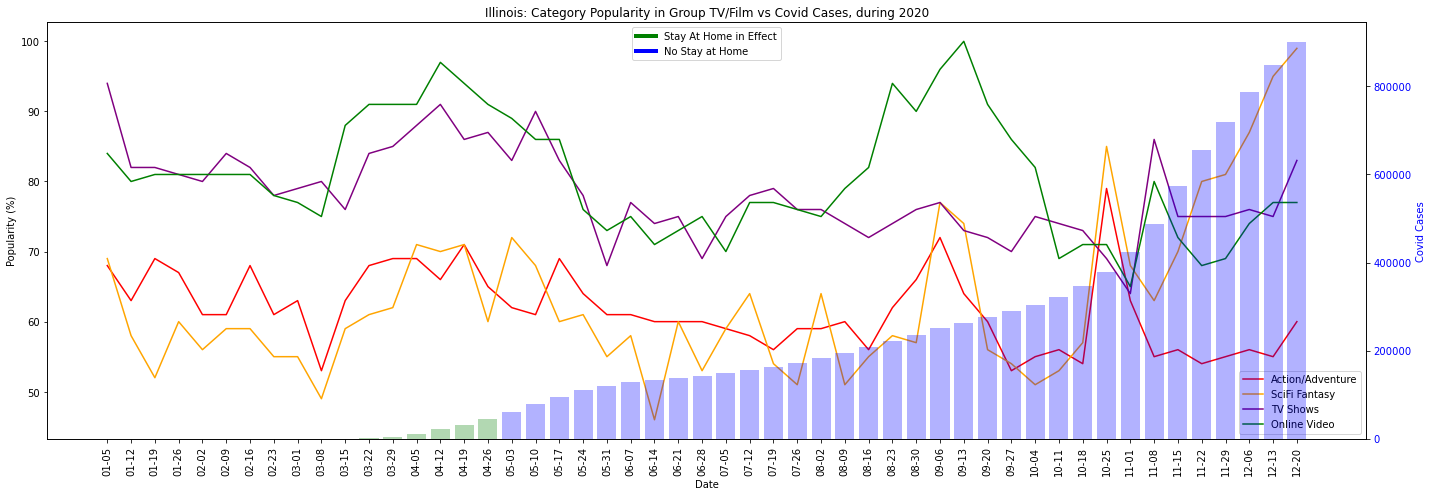

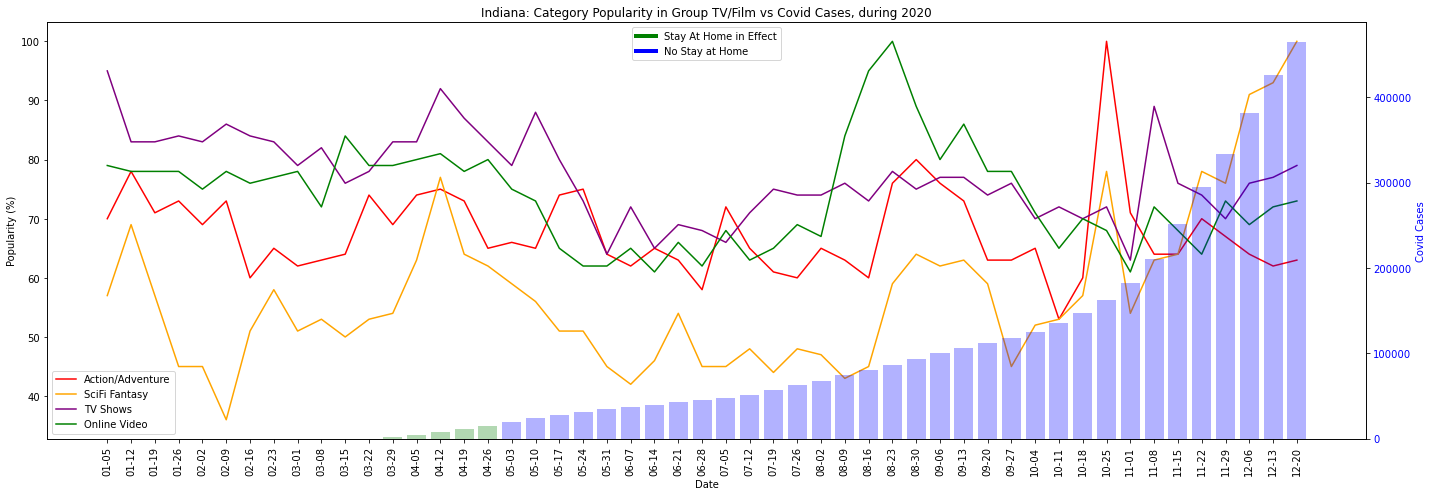

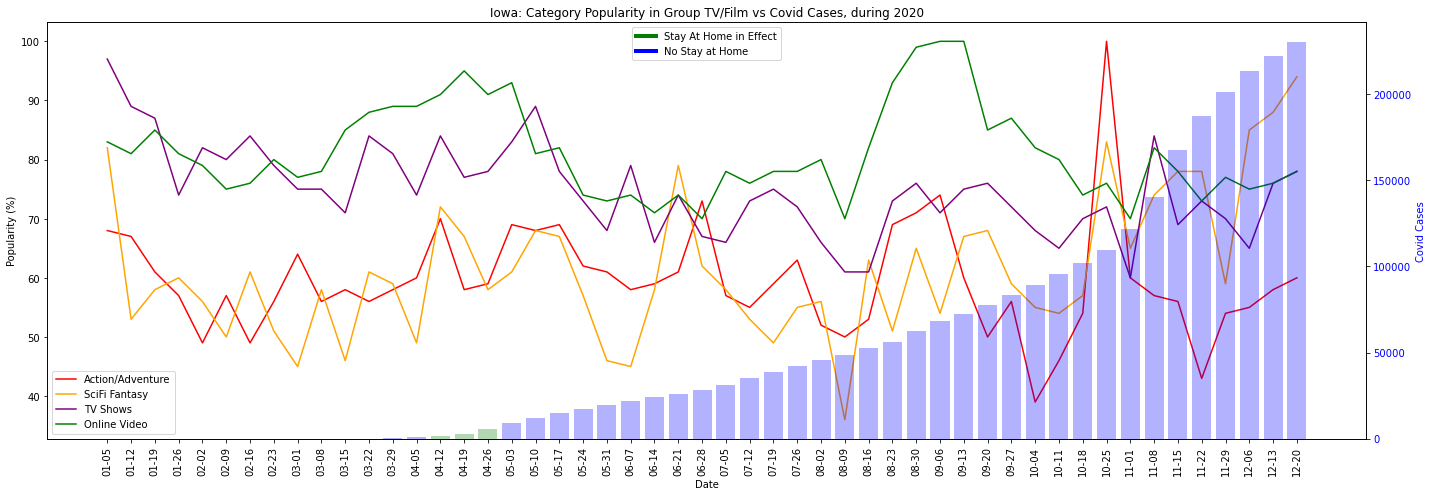

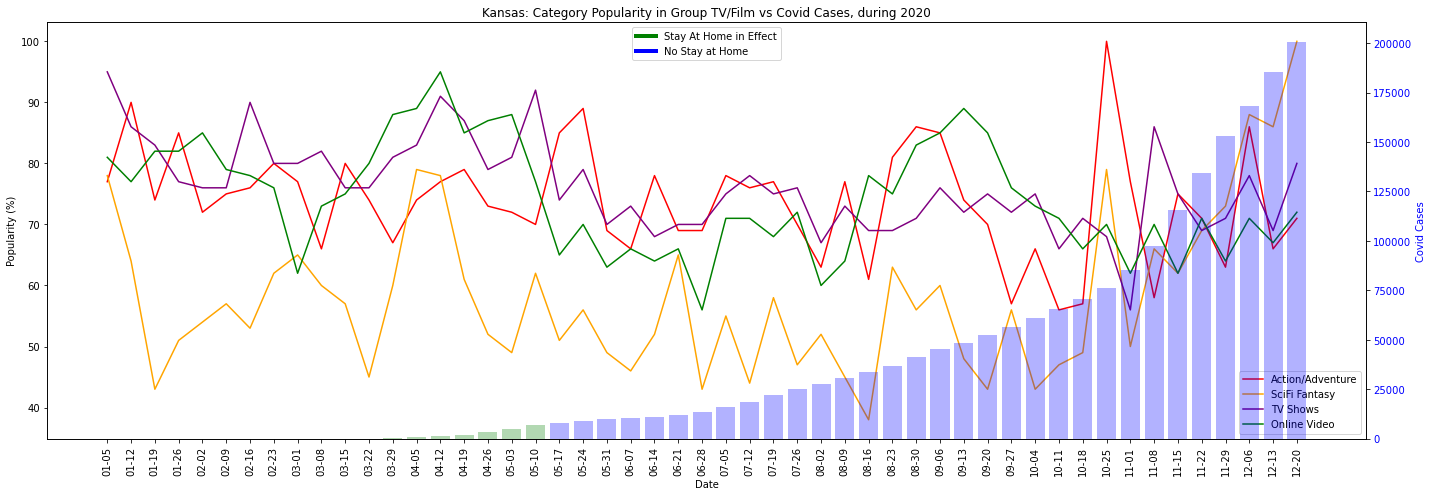

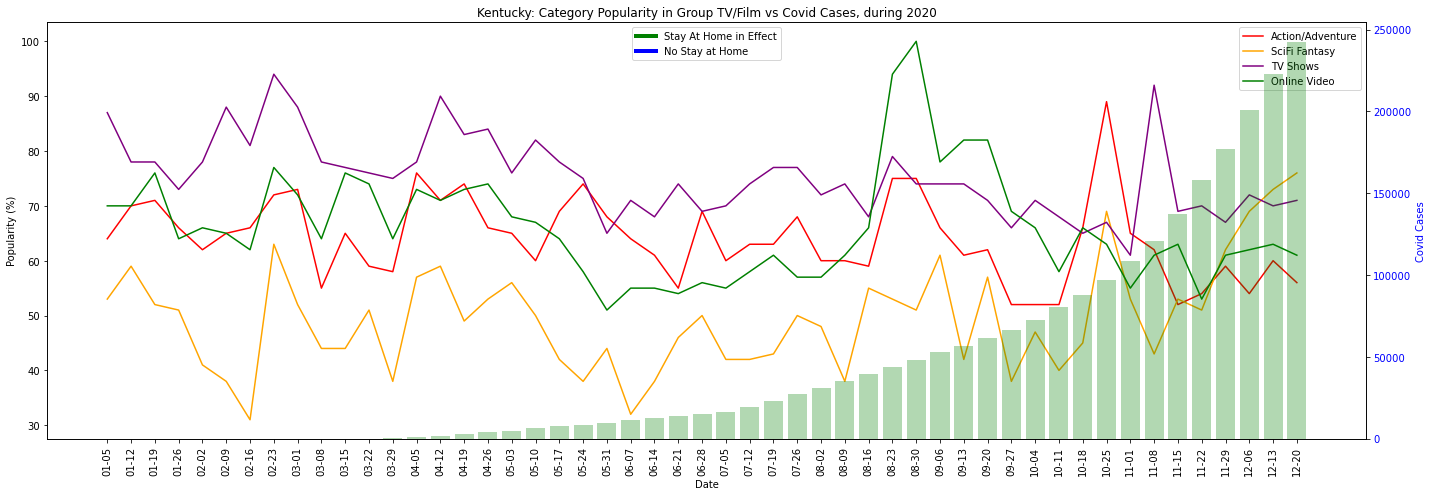

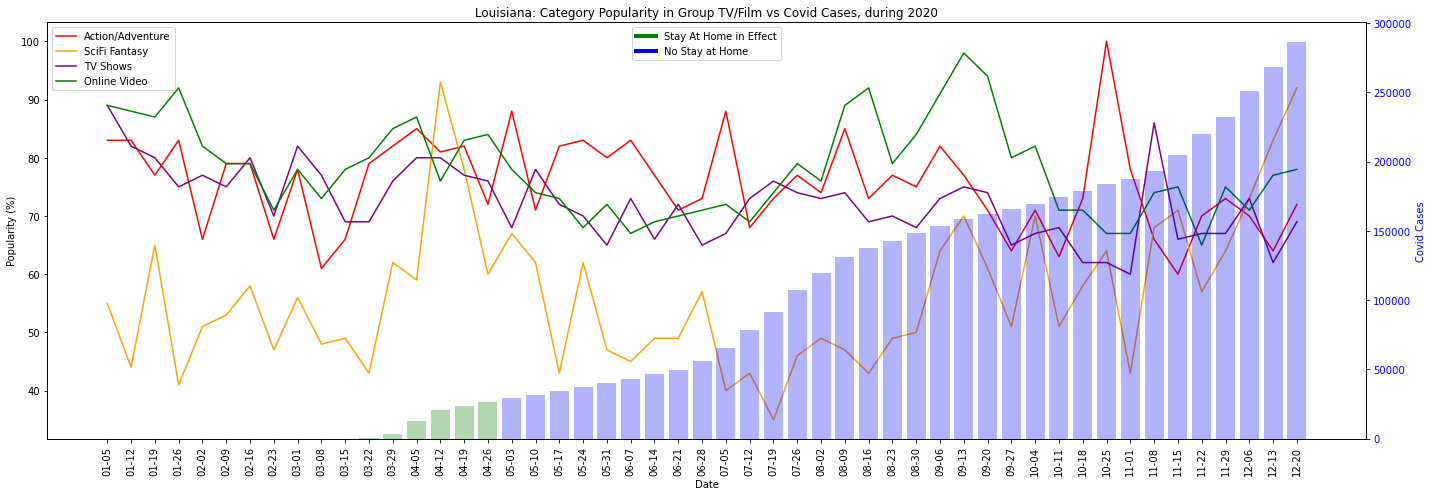

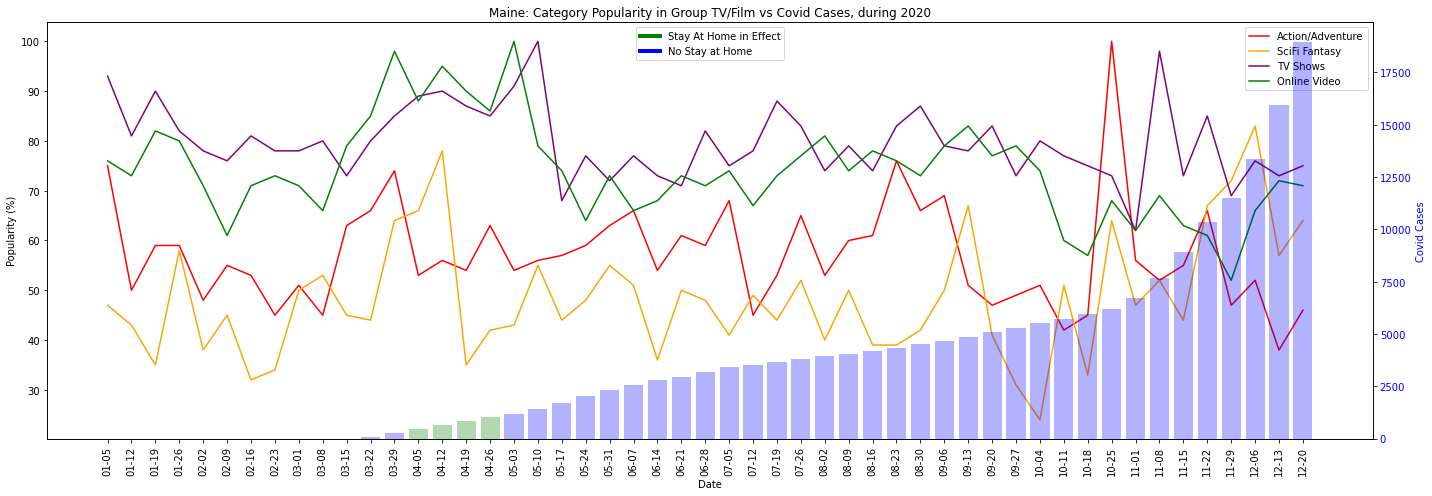

In [12]:
for x in range(10, 20):
    tvfilm_graph_maker(x)

In [13]:
def comms_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['mobiles'], color='red', label='Mobiles')

    ax.plot(graphs_time_list, data_2020_df['voice_vid_chat'], color='purple', label='Voice/Video Chat')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Communication vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_Communication/{state_names[ind_no]}.png') 
    plt.show()
    
    plt.show()

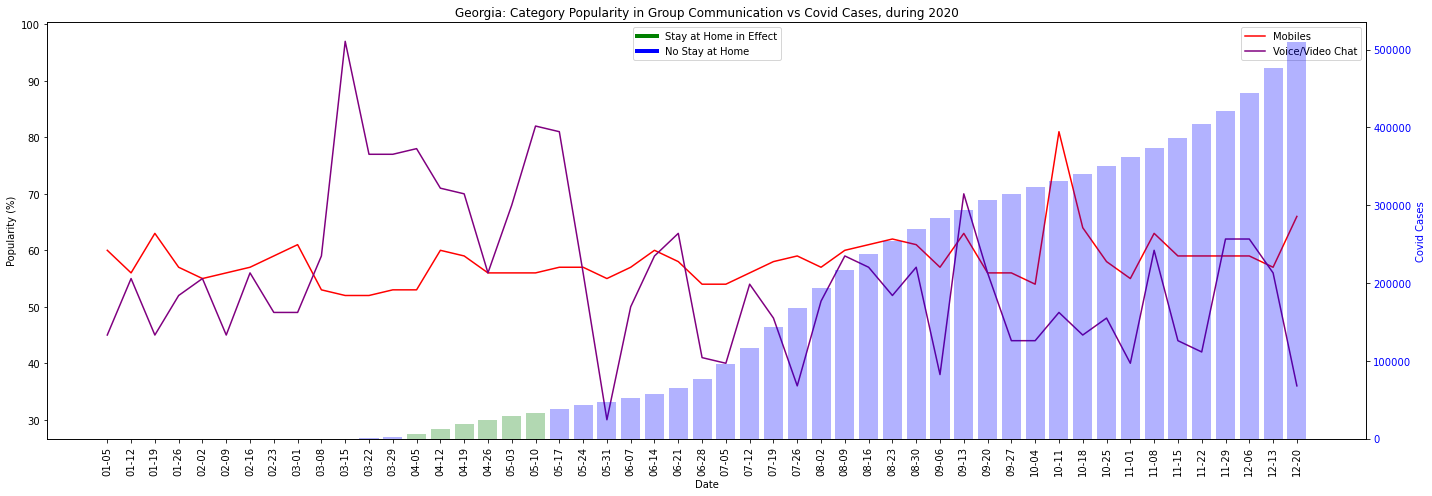

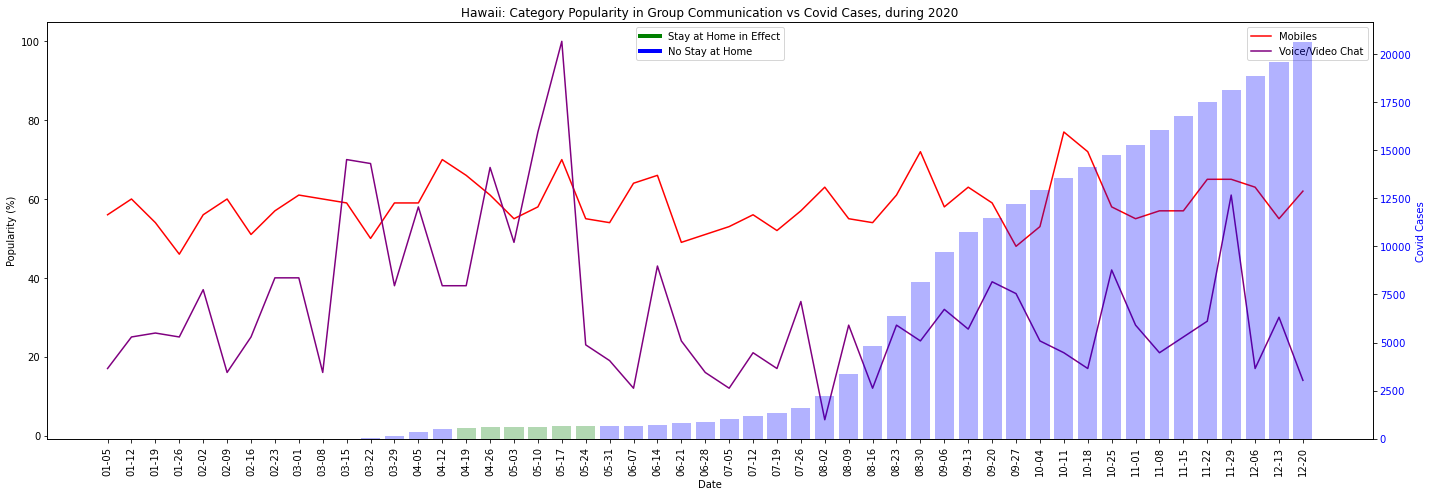

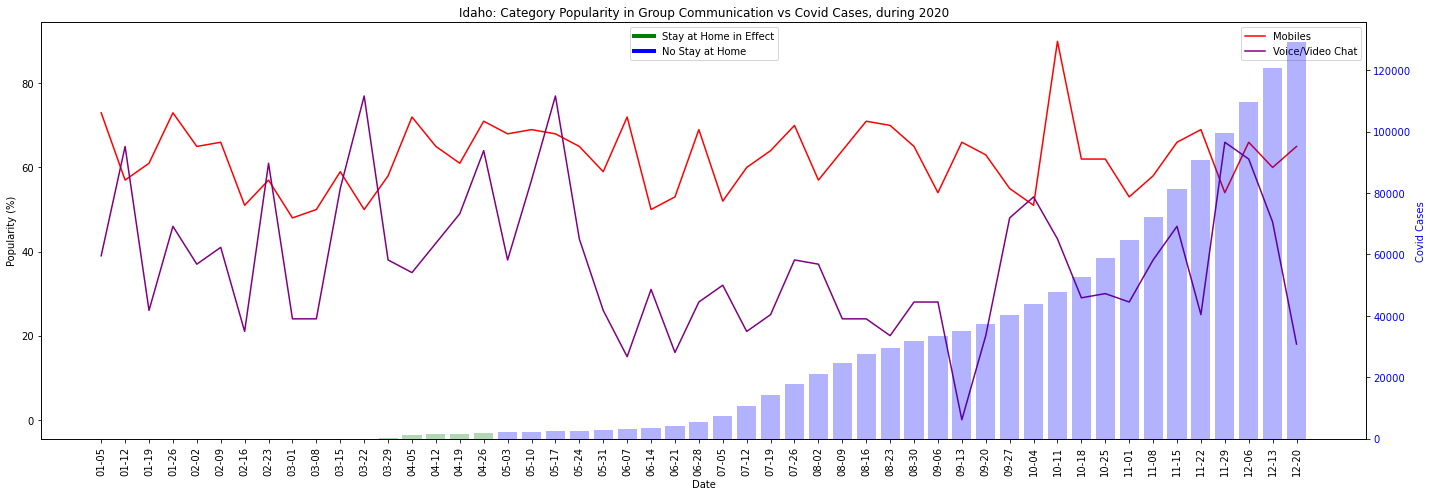

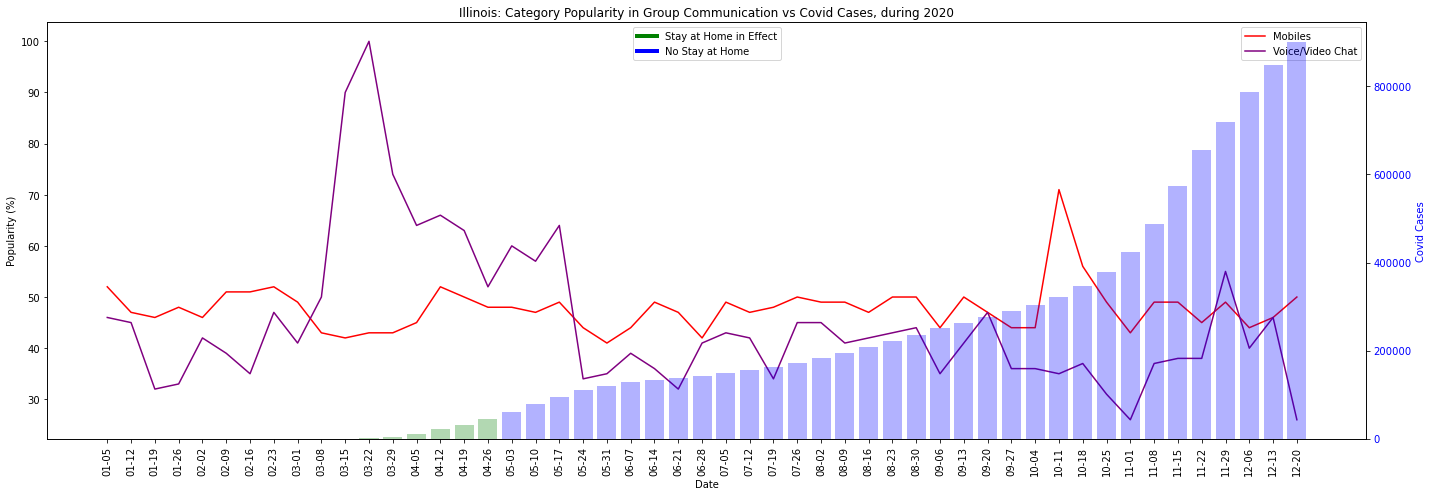

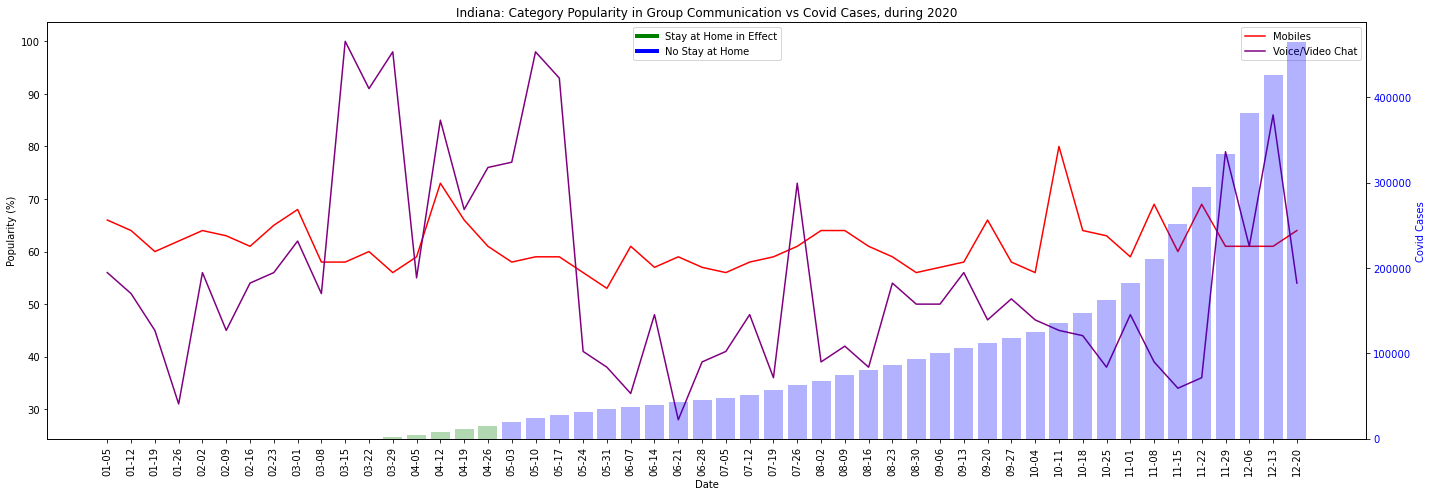

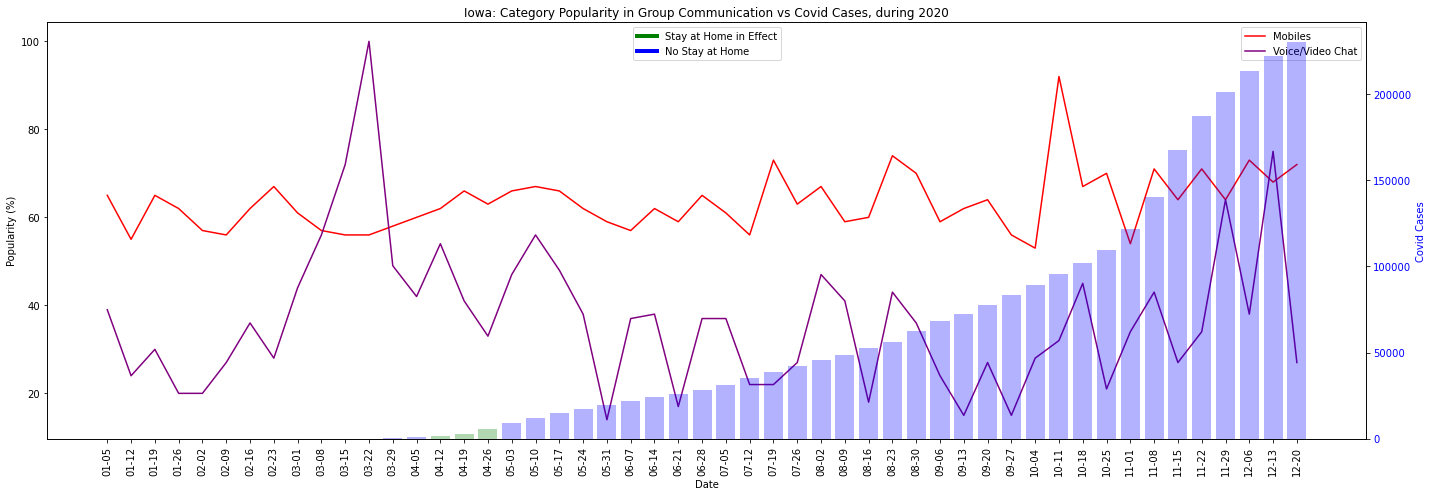

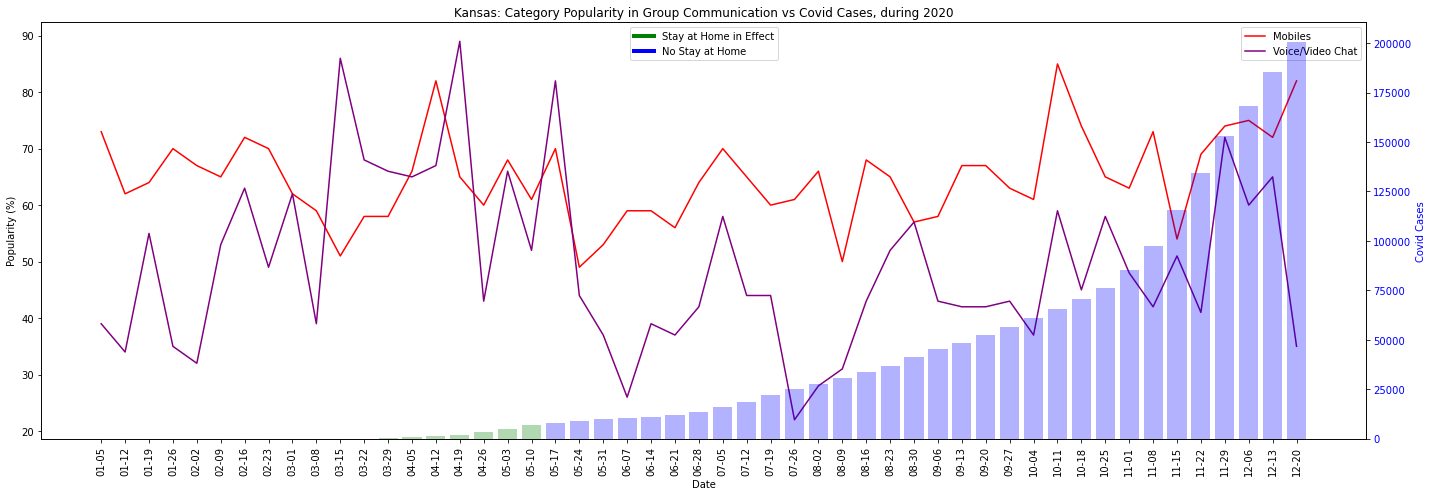

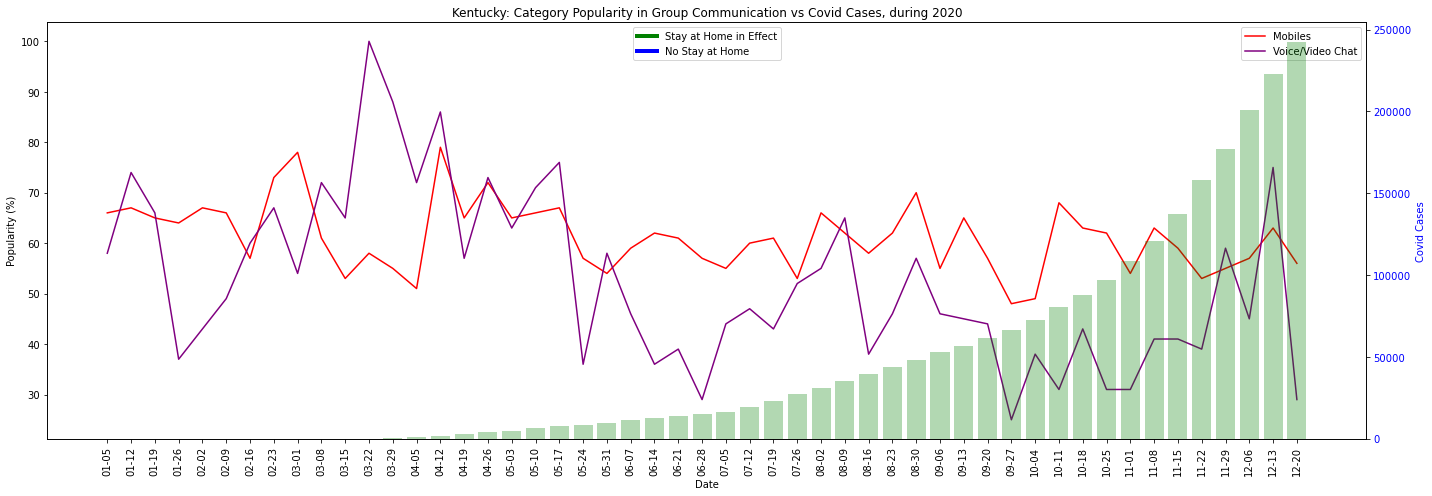

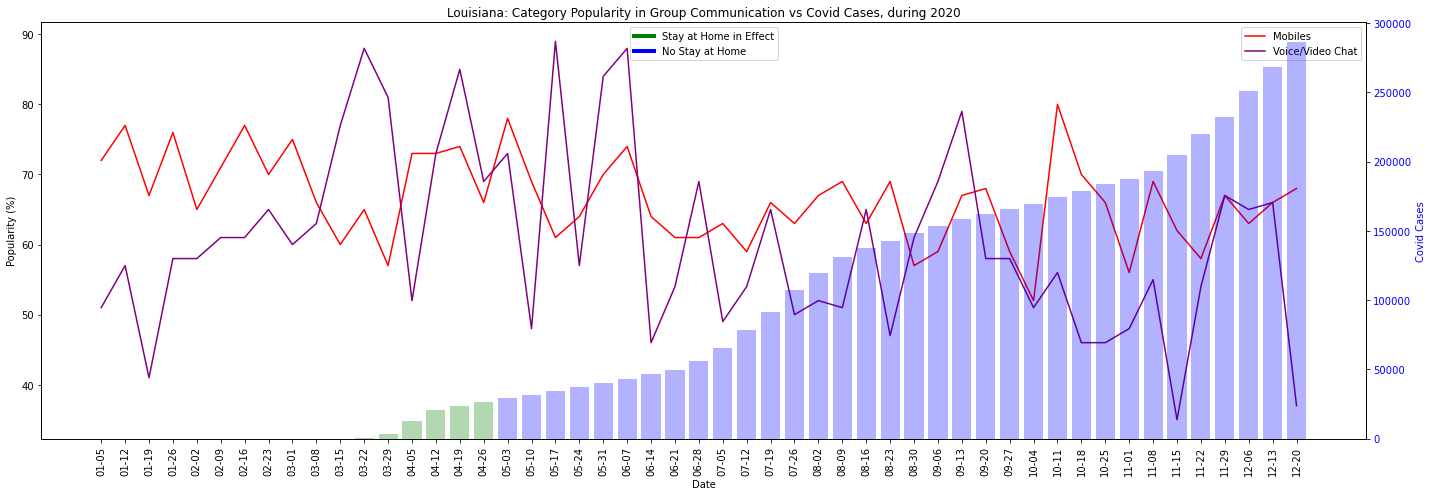

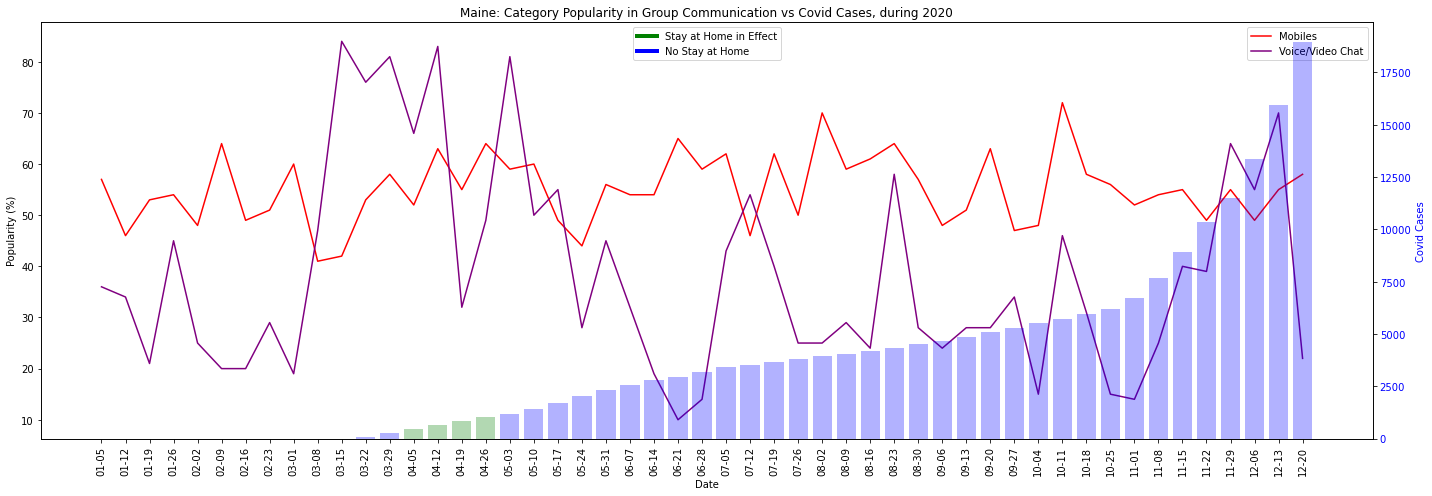

In [14]:
for x in range(10, 20):
    comms_graph_maker(x)

In [15]:
def health_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['infectious_diseases'], color='orange', label='Infectious Diseases')

    ax.plot(graphs_time_list, data_2020_df['health_news'], color='brown', label='Health News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Health vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_Health/{state_names[ind_no]}.png') 
    
    plt.show()

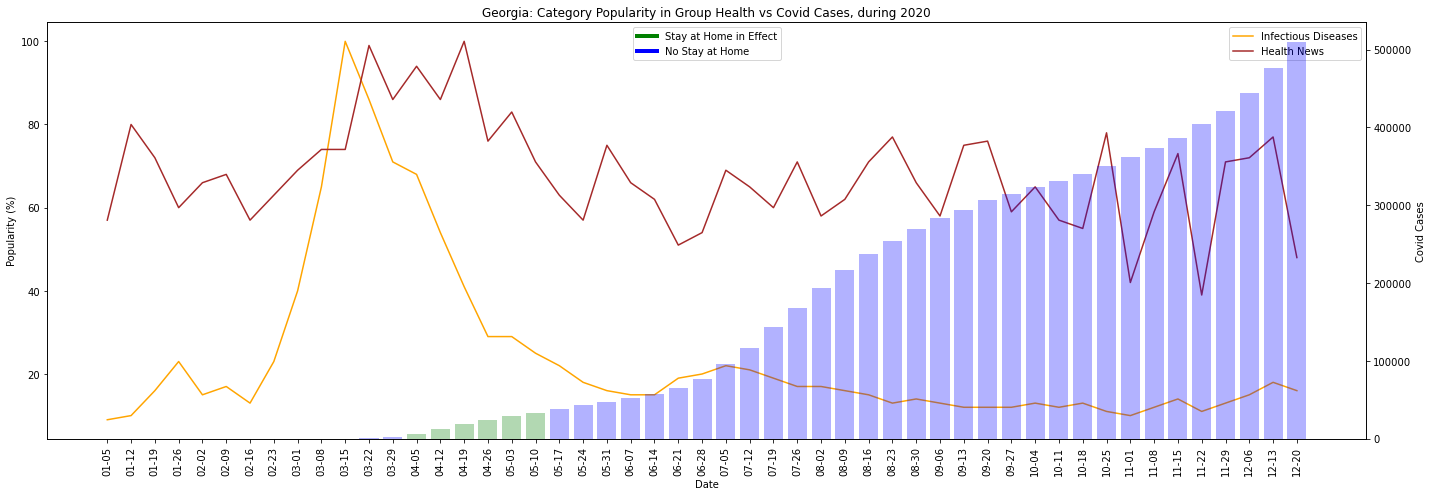

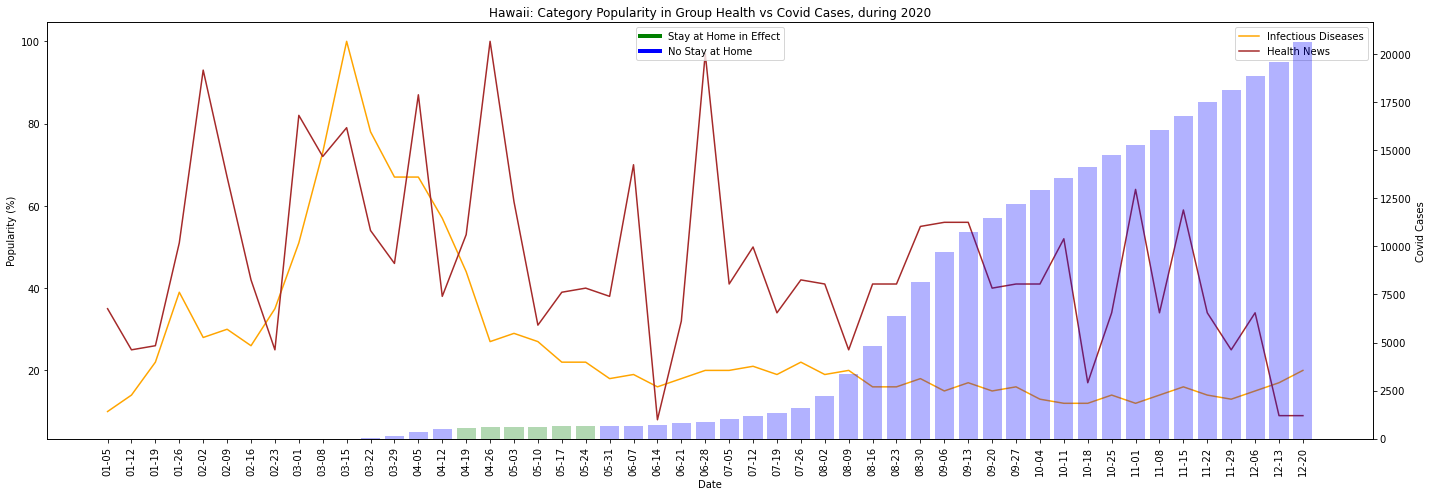

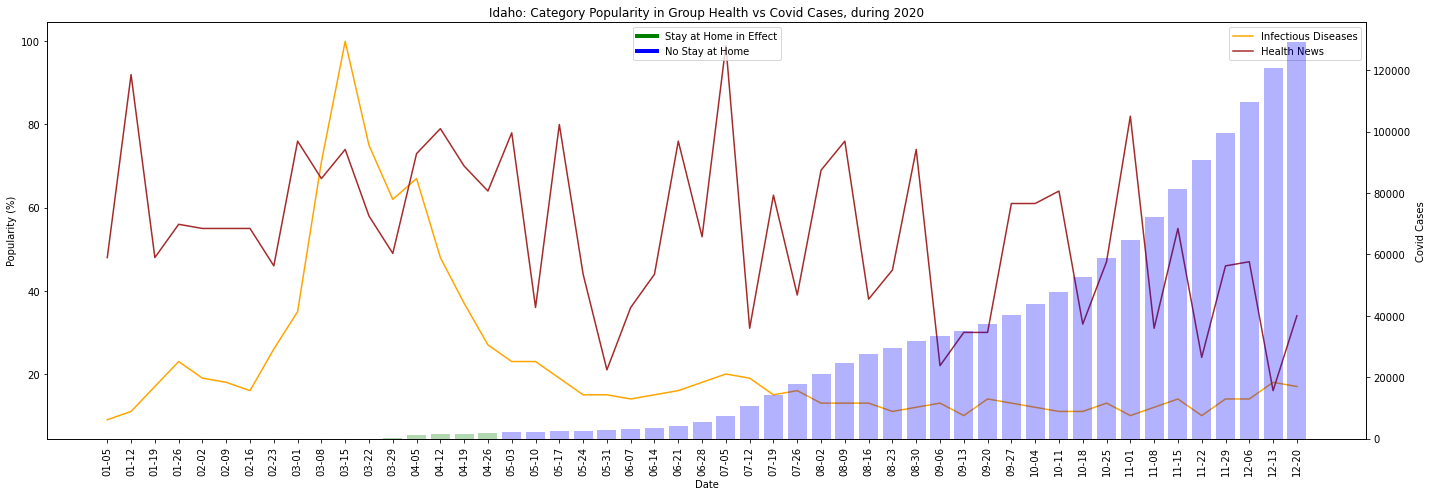

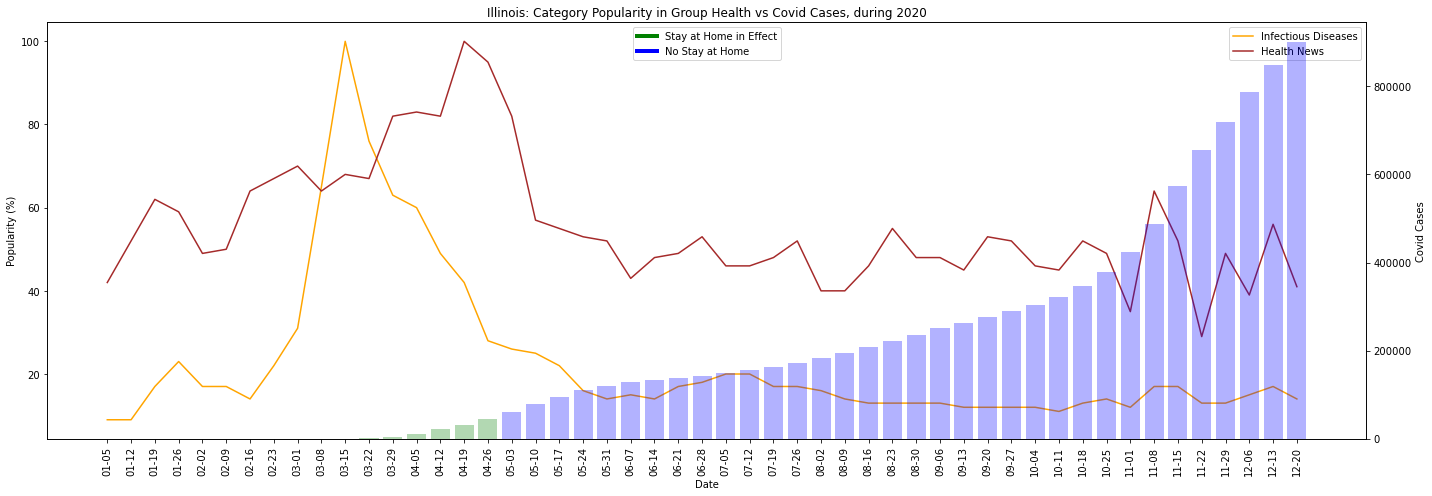

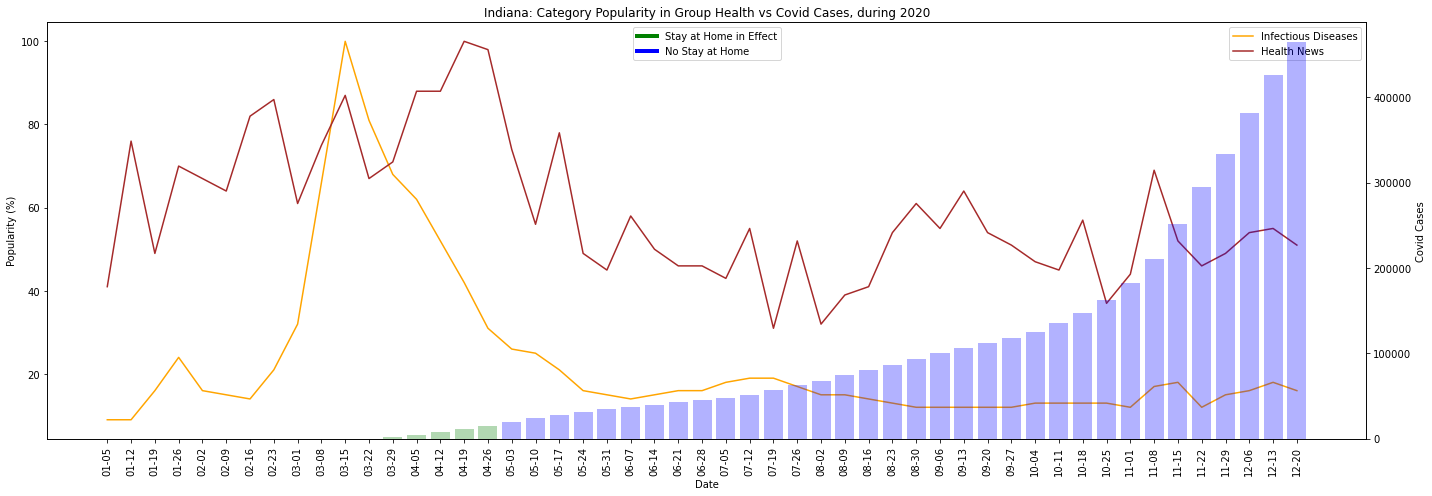

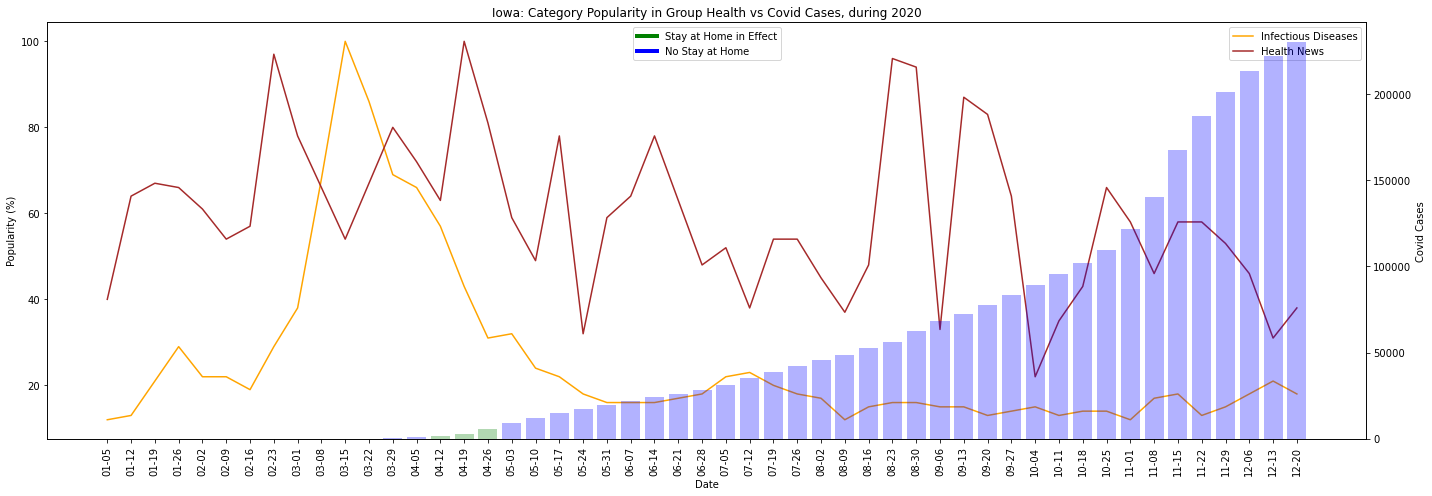

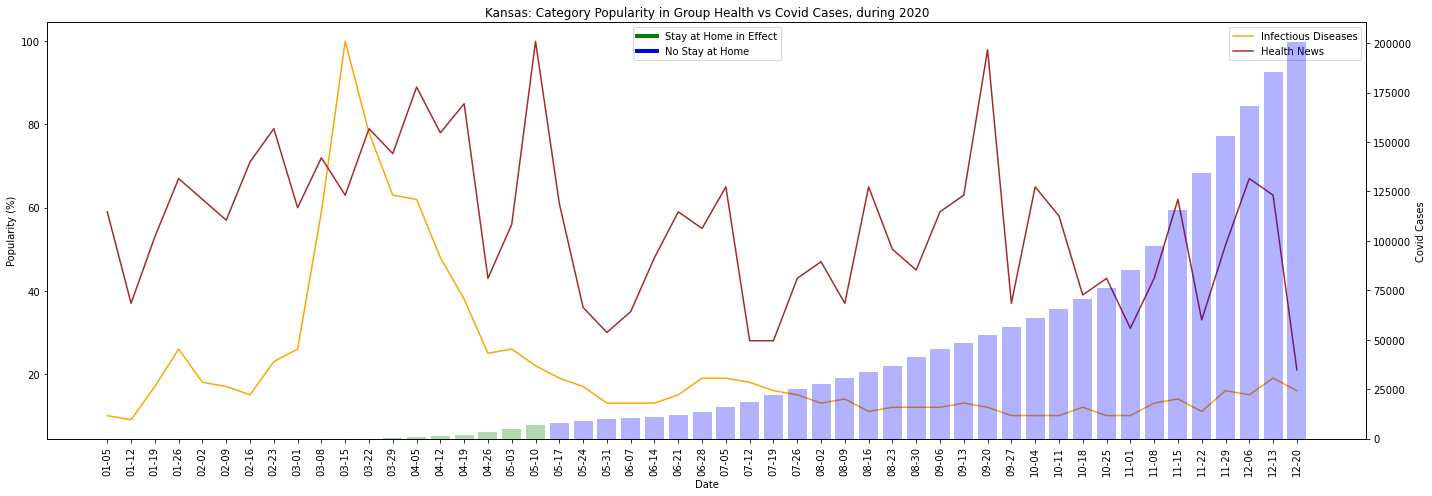

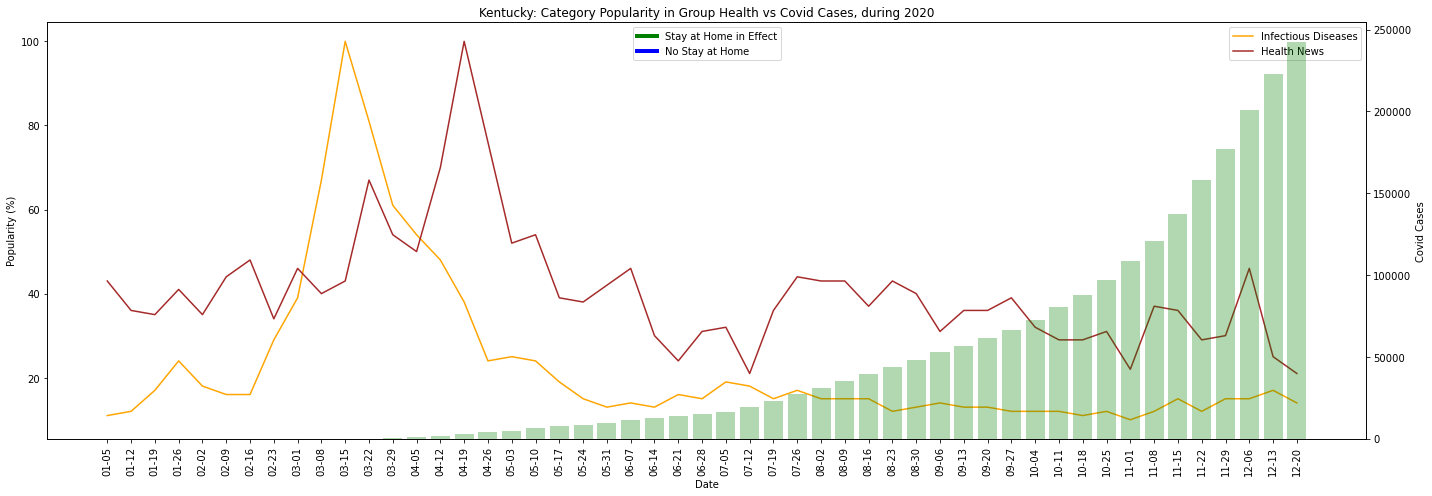

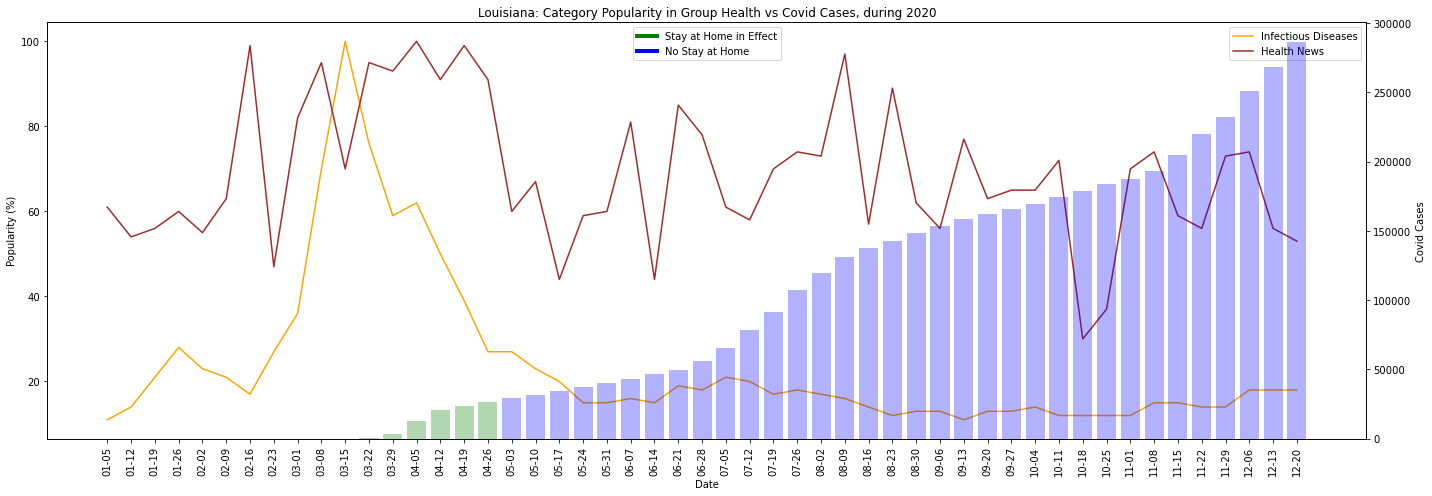

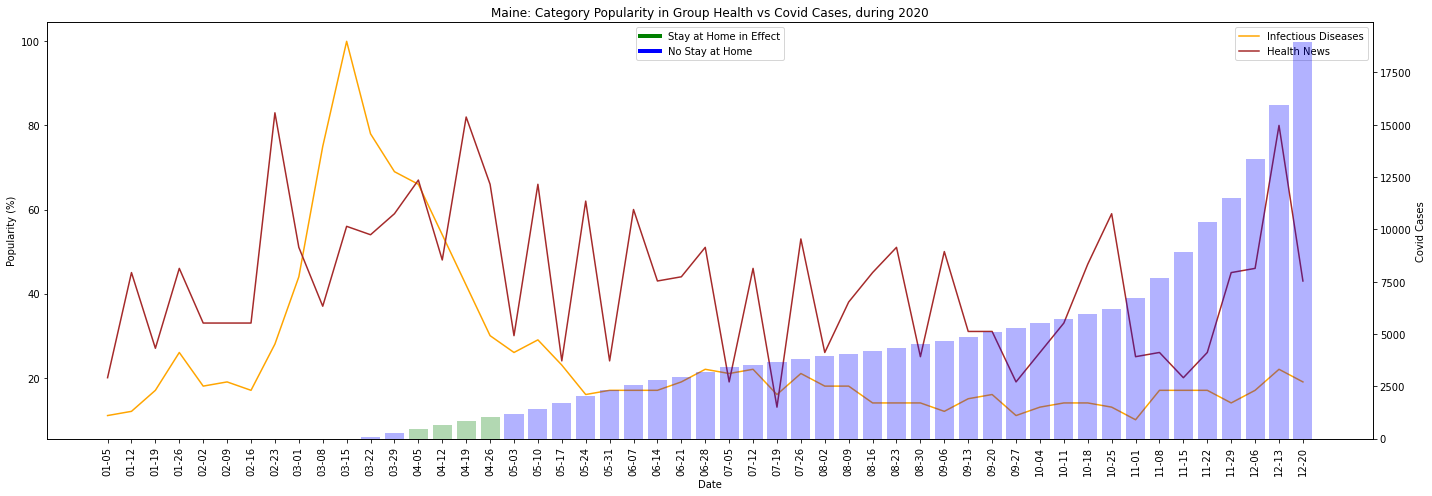

In [16]:
for x in range(10, 20):
    health_graph_maker(x)

In [17]:
def ent_other_gc_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['games_systems_consoles'], color='red', label='Games, Systems, Consoles')

    ax.plot(graphs_time_list, data_2020_df['lottos'], color='green', label='Lottery & Sweepstakes')
    
    ax.plot(graphs_time_list, data_2020_df['celebs'], color='brown', label='Celebrity News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Other Entertainment (Games & Celebs) vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_OtherEntertainment/{state_names[ind_no]}.png') 
    
    plt.show()

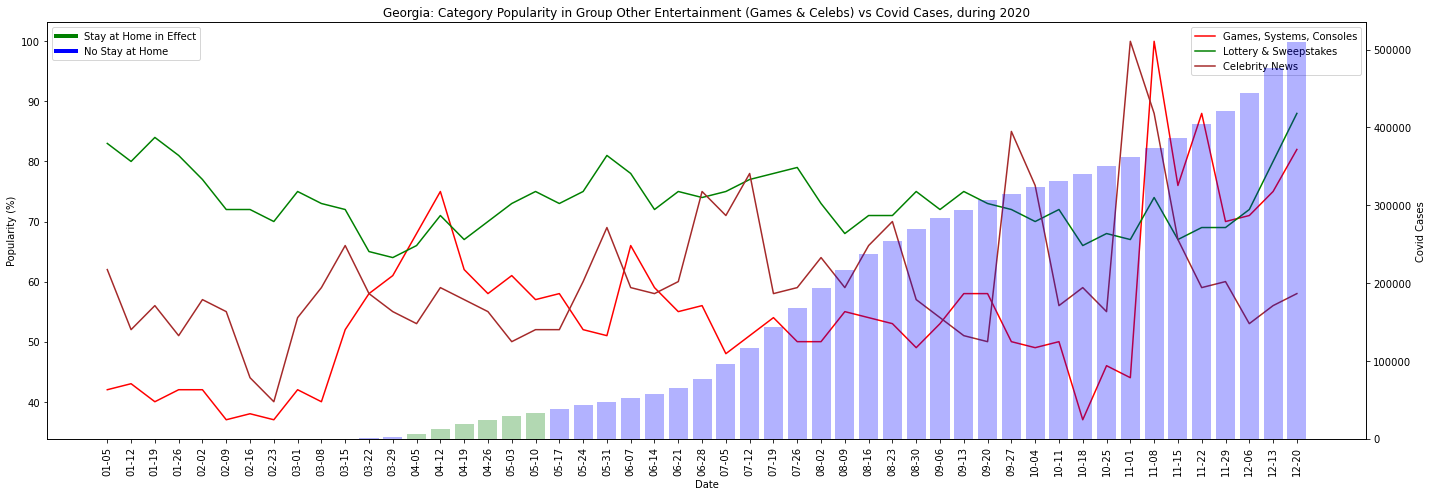

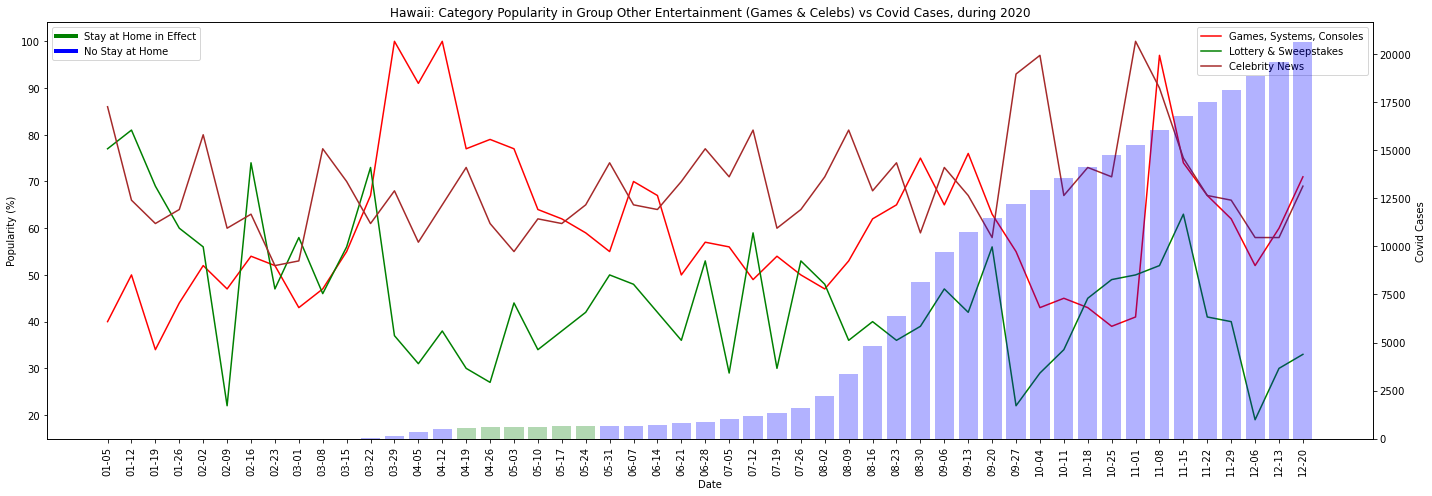

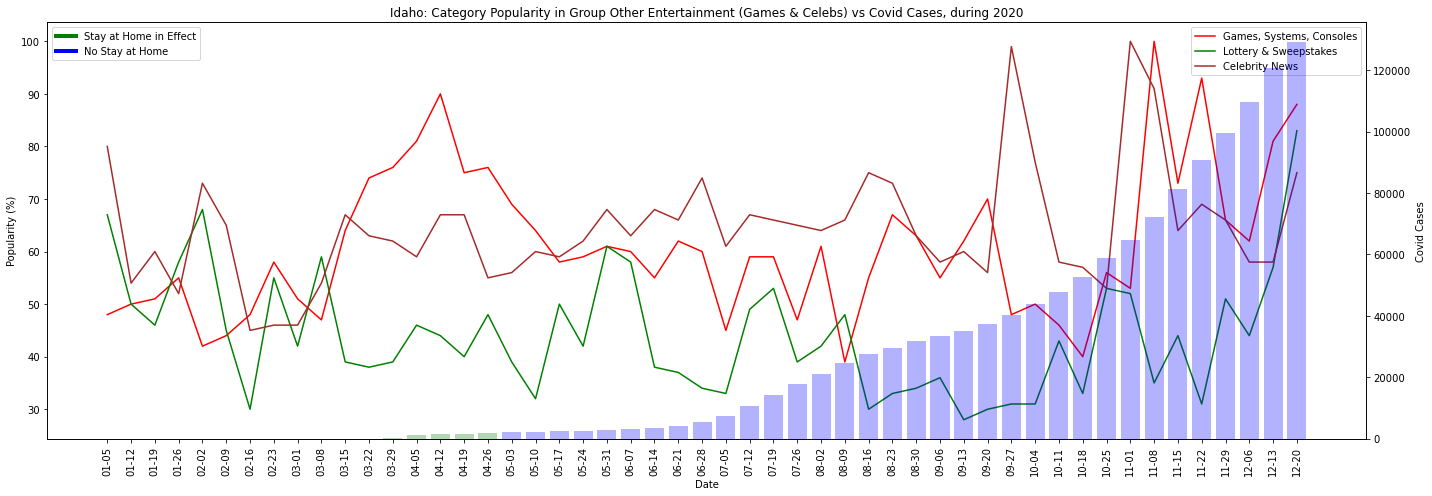

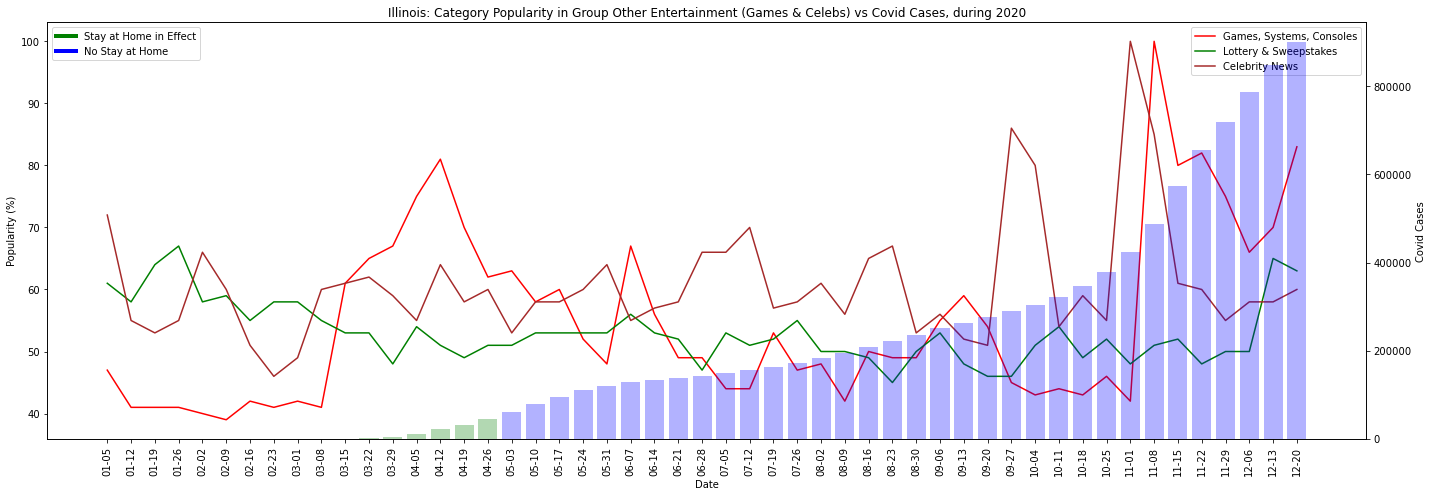

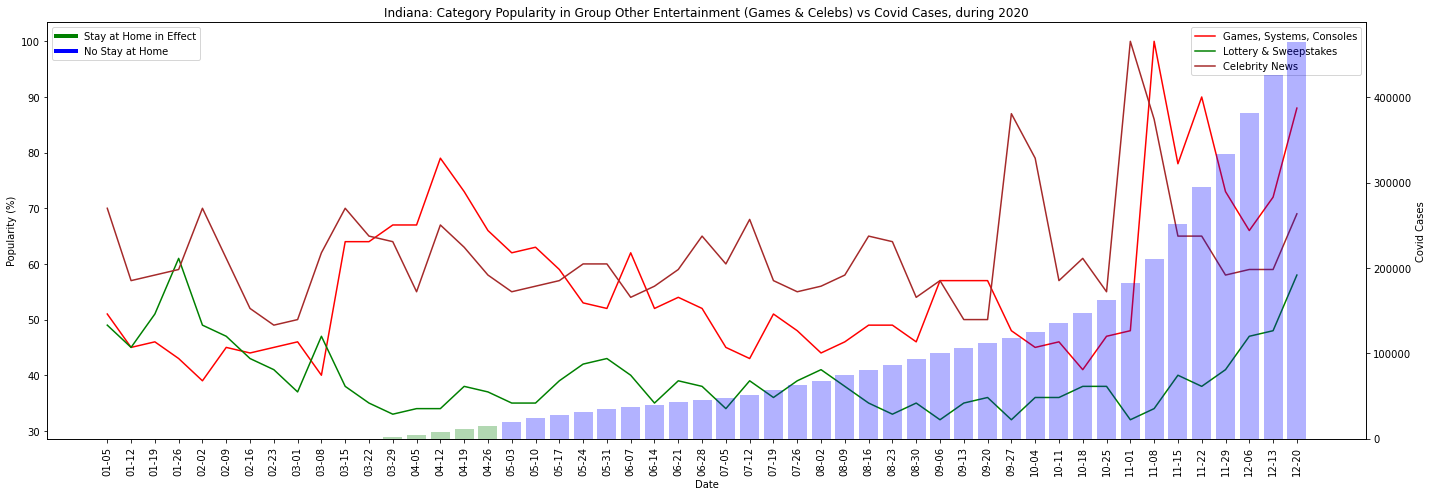

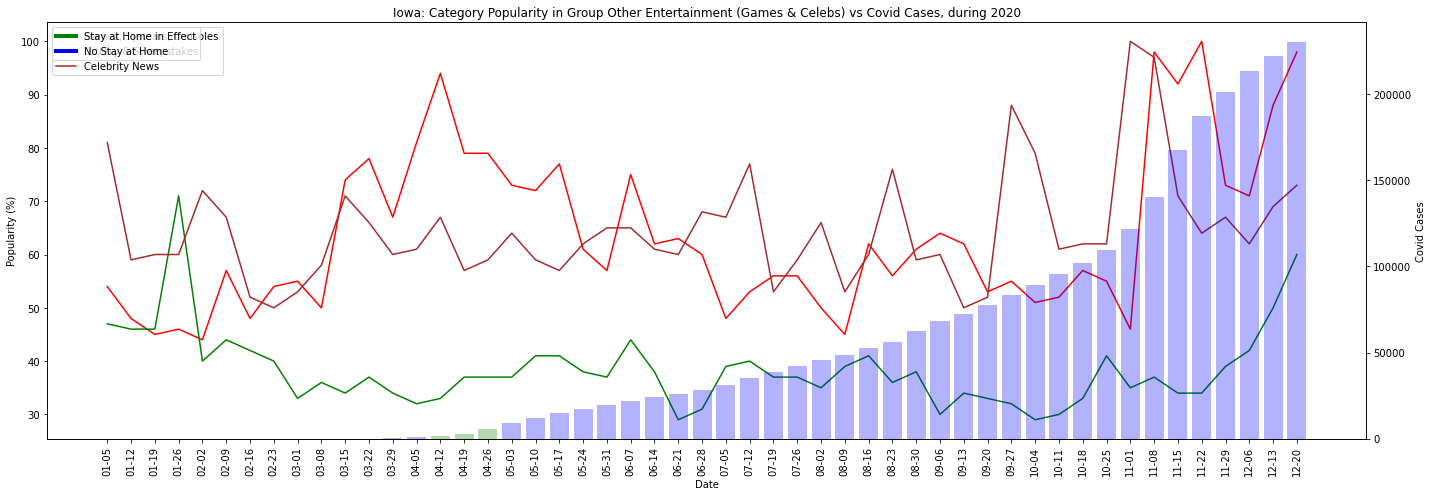

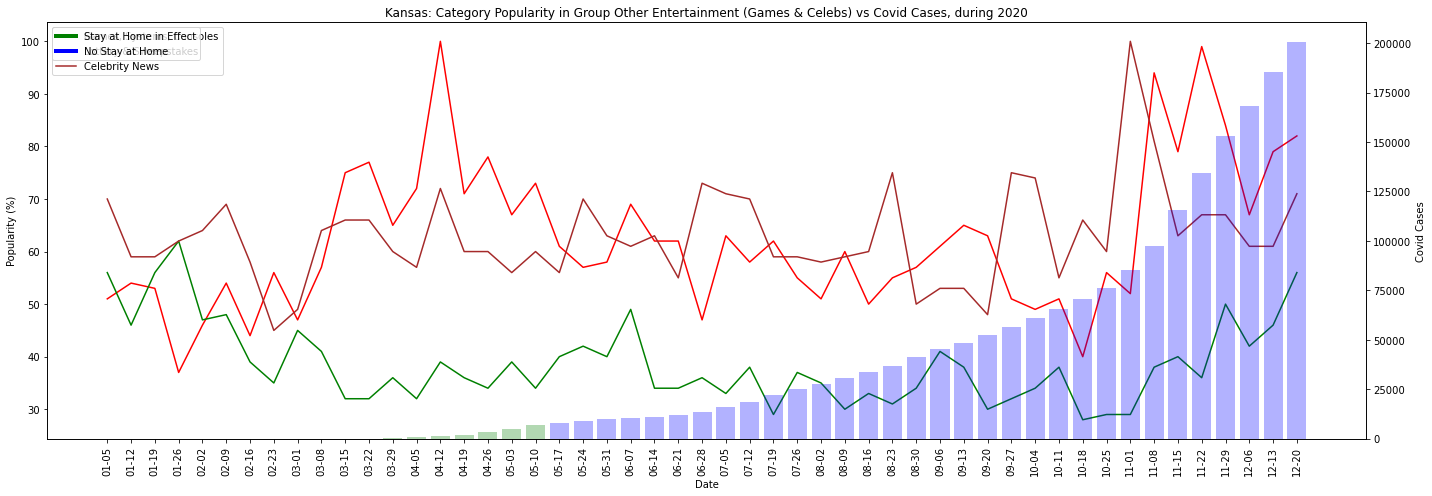

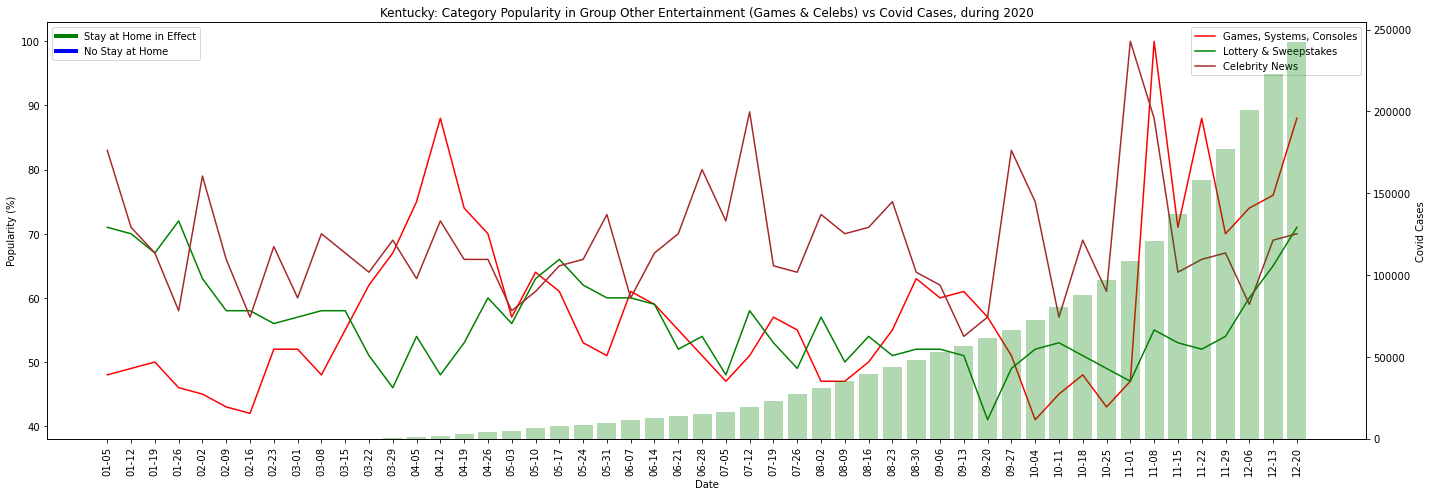

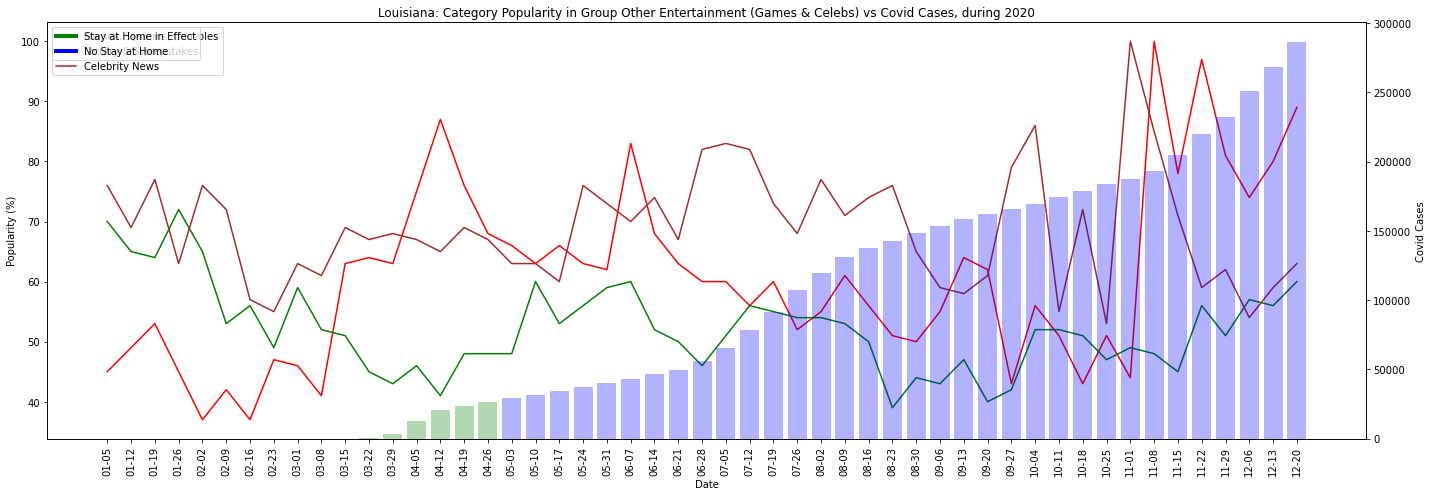

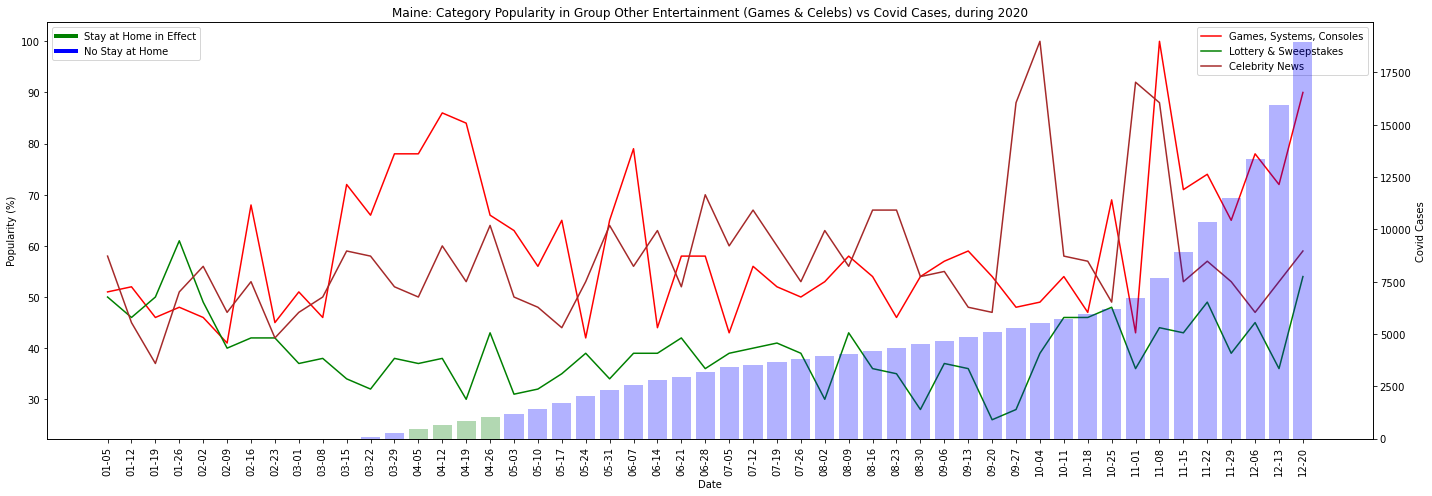

In [18]:
for x in range(10, 20):
    ent_other_gc_graph_maker(x)

In [19]:
def ent_other_gen_med_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['arts_entertainment'], color='orange', label='Arts & Entertainment')

    ax.plot(graphs_time_list, data_2020_df['books_lit'], color='purple', label='Books & Lit')
    
    ax.plot(graphs_time_list, data_2020_df['entertainment_media'], color='cyan', label='Entertainment Media')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Other Entertainment (General & Media) vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_GeneralEntertainment/{state_names[ind_no]}.png') 
    
    plt.show()

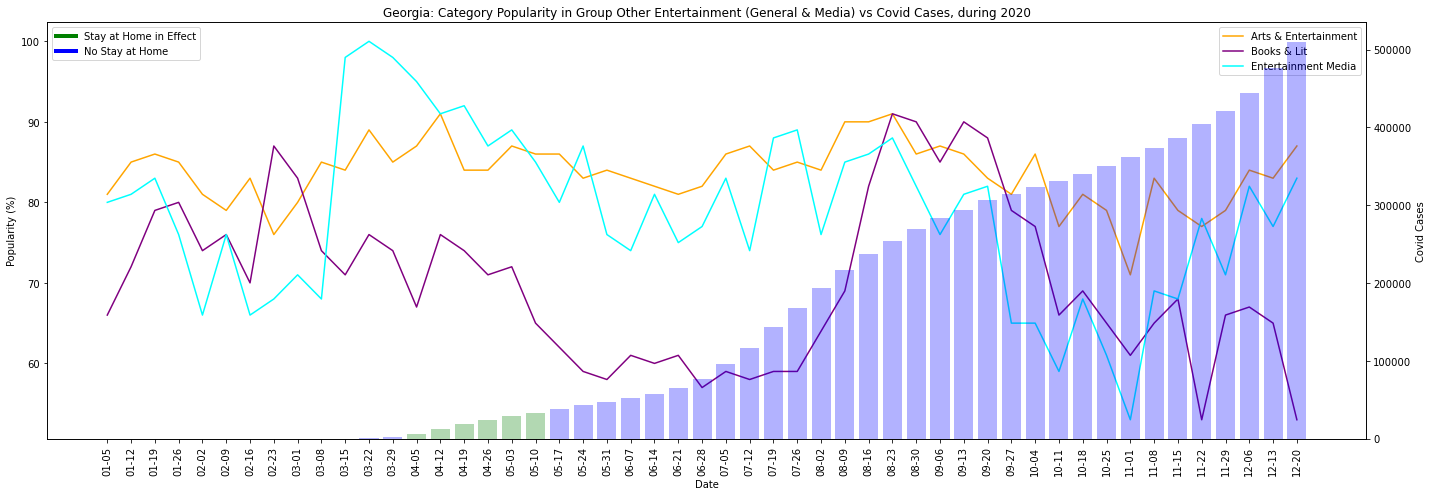

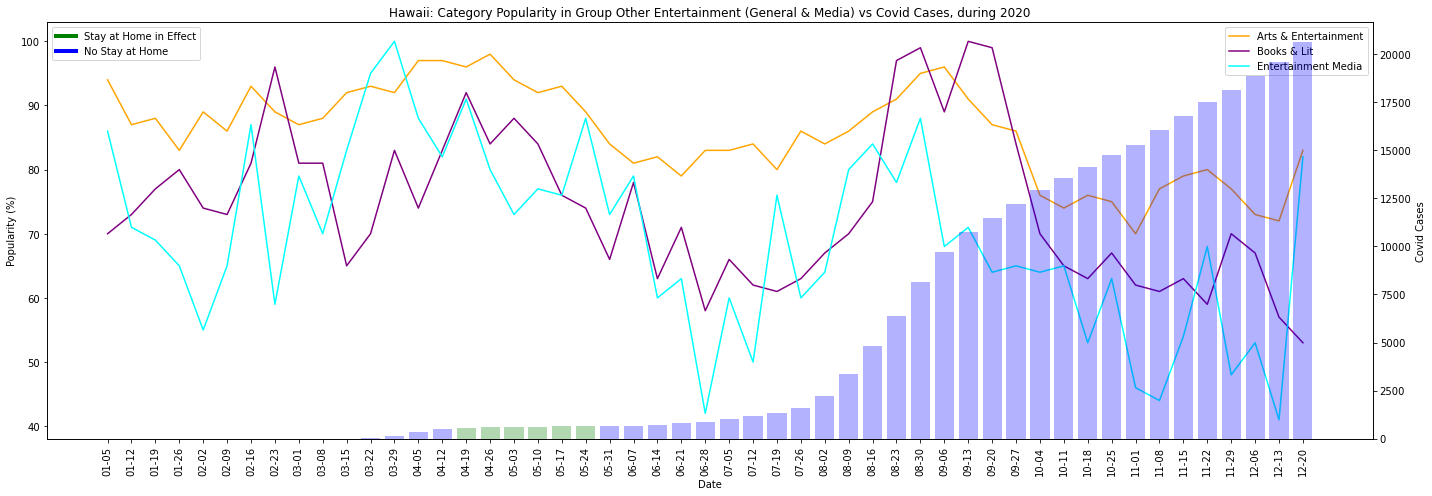

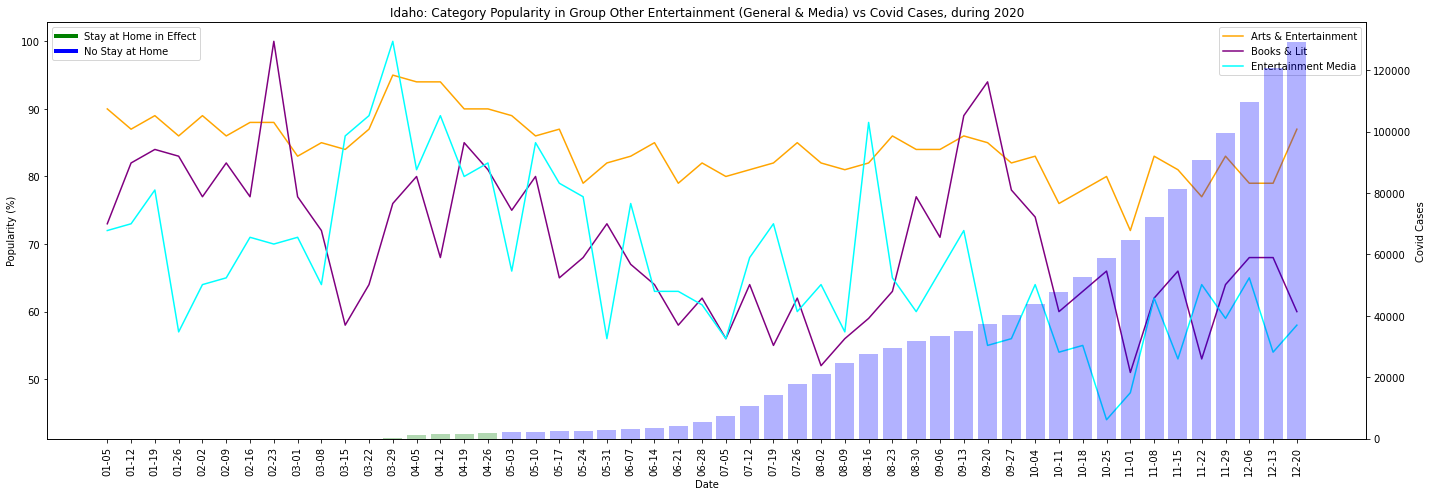

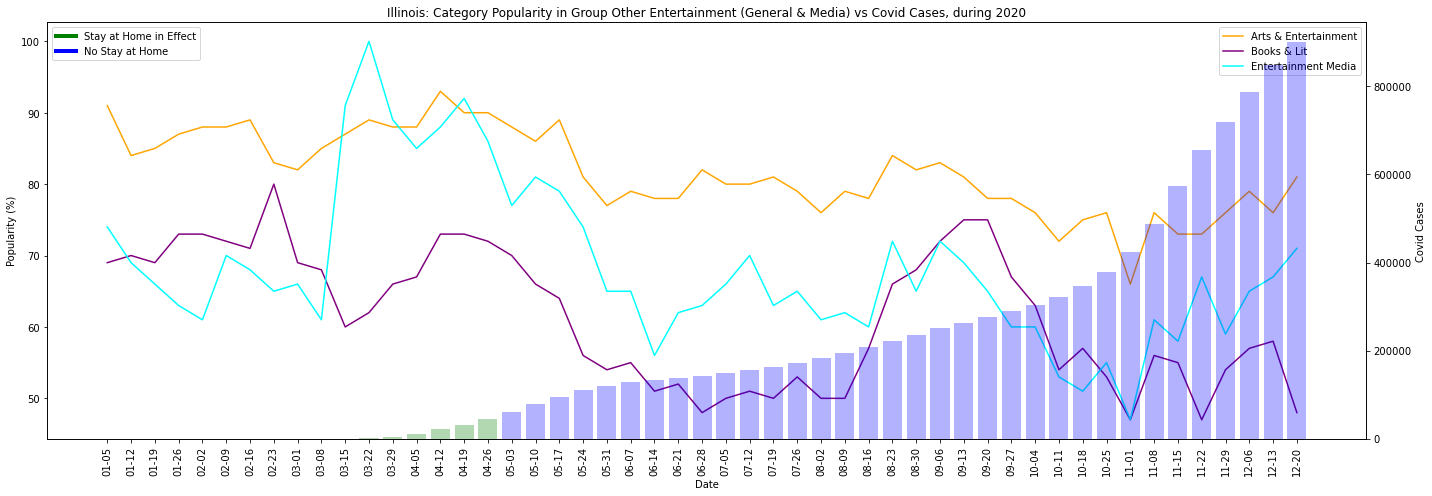

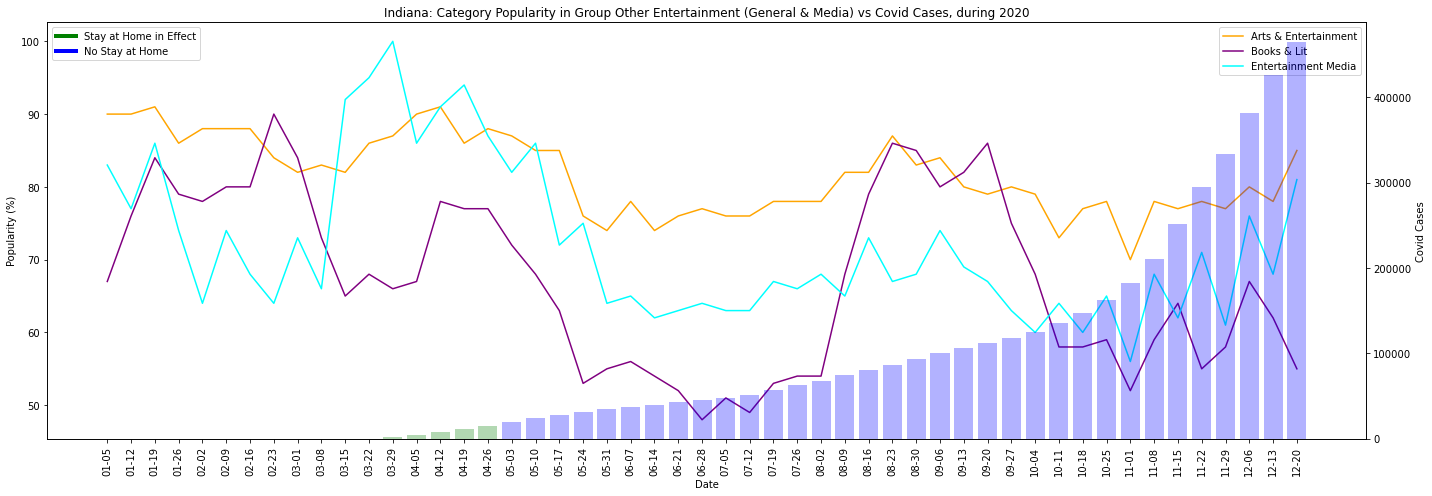

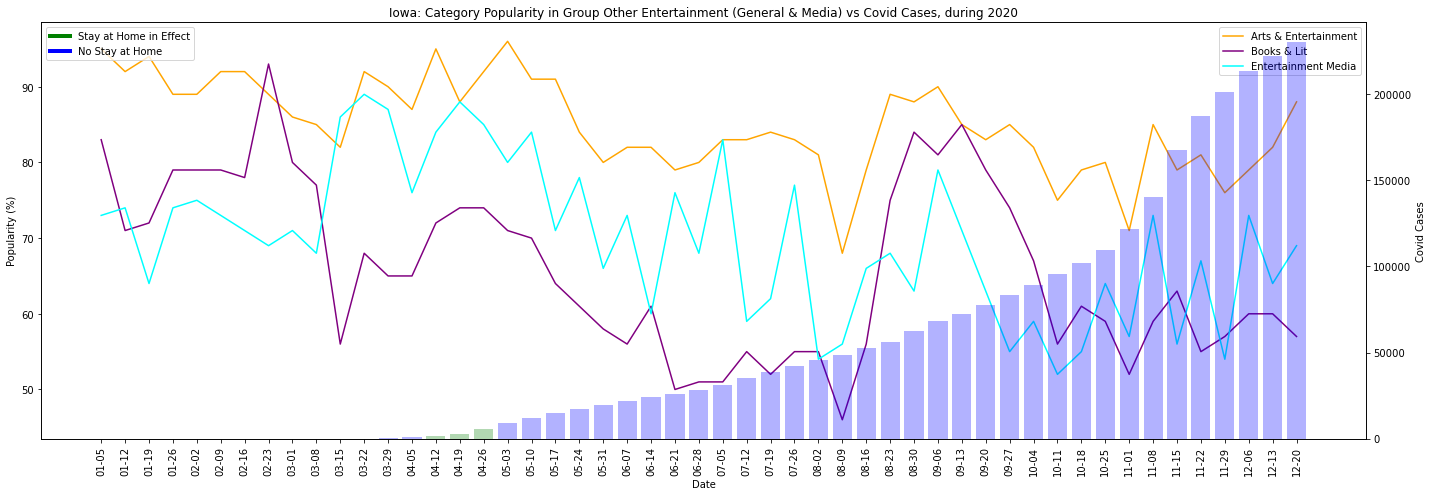

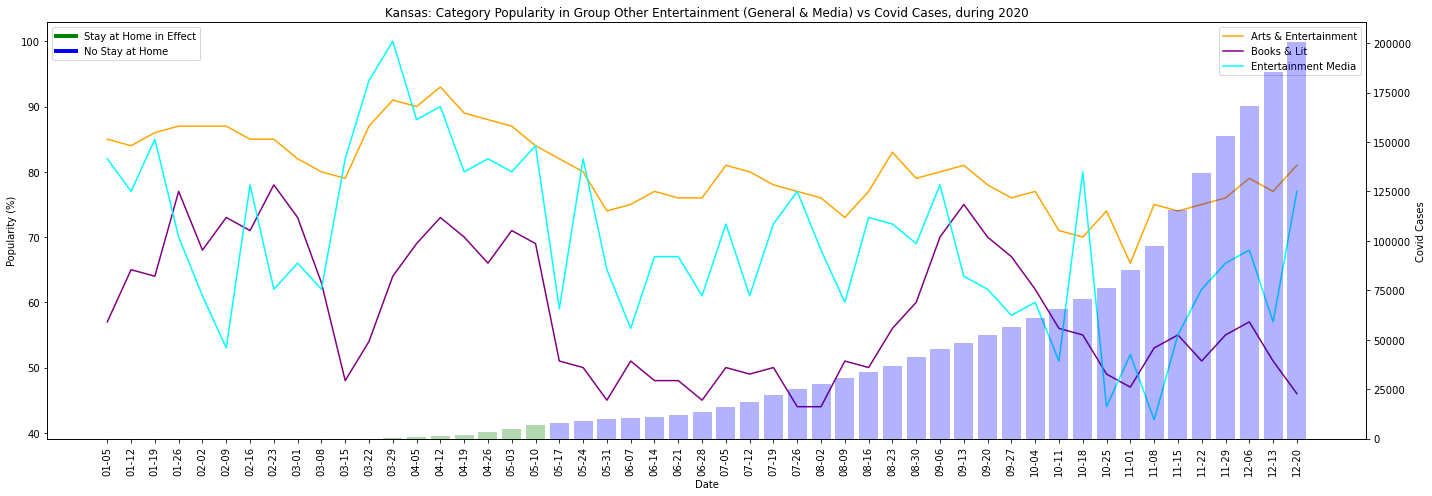

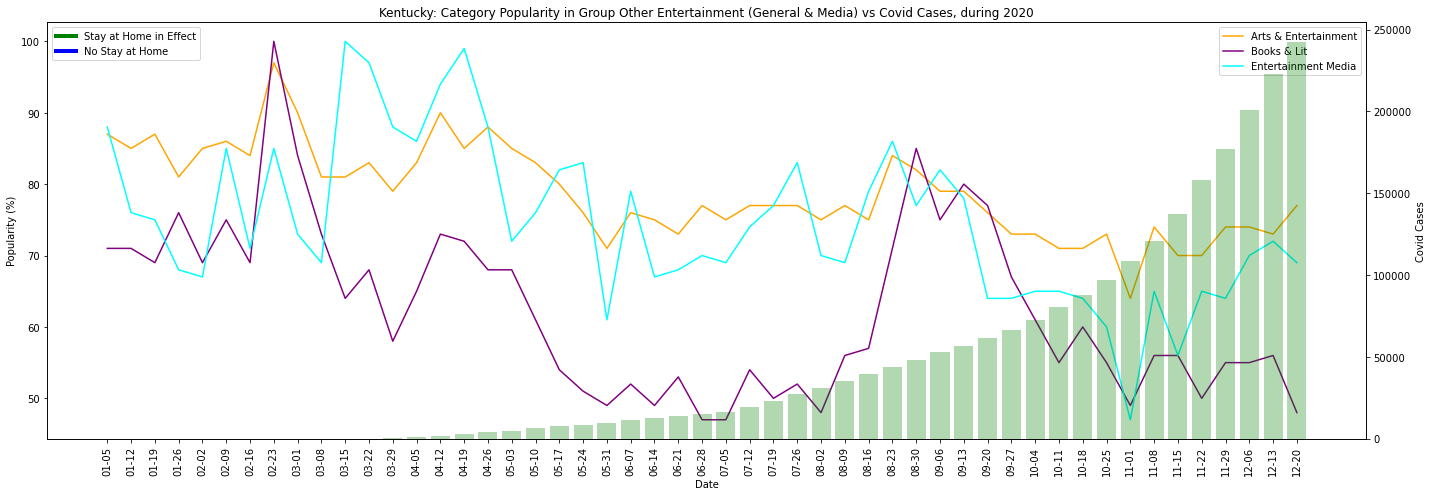

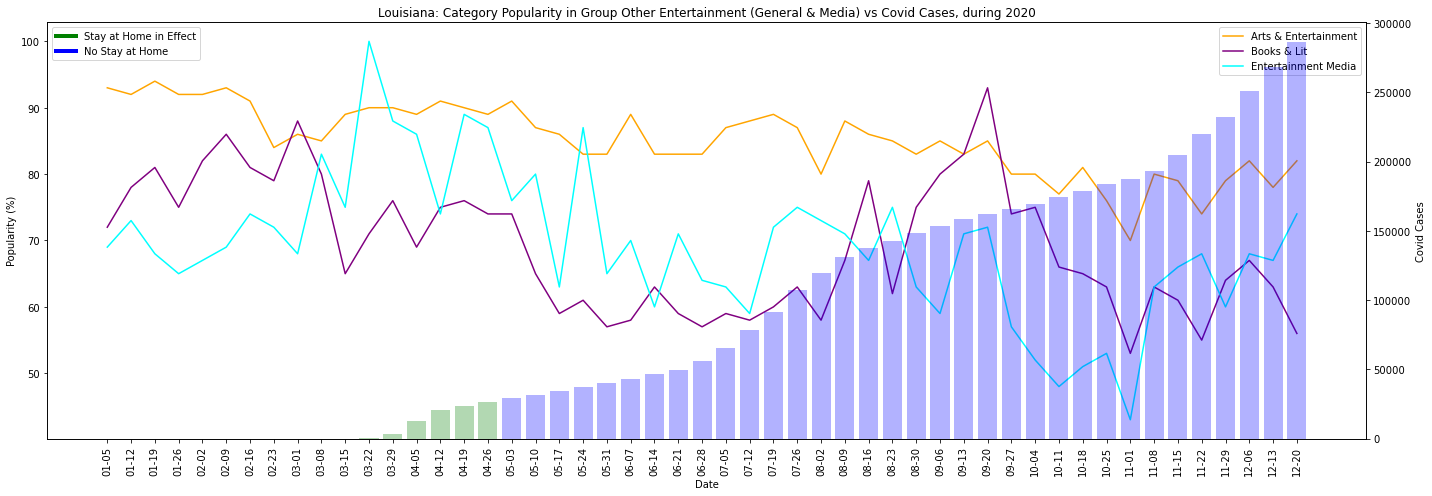

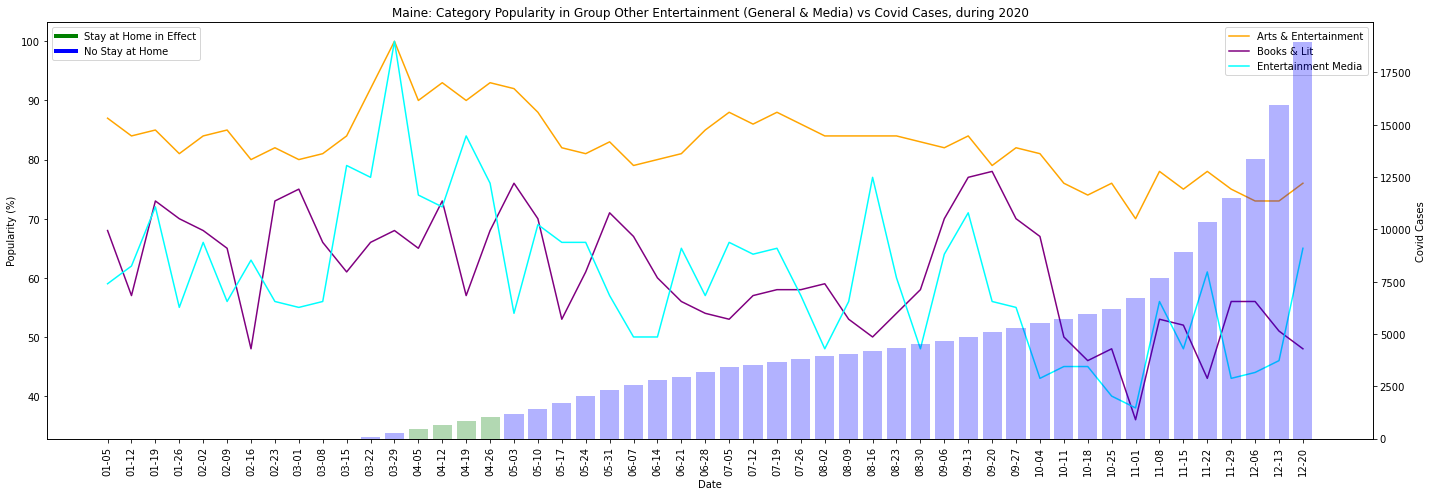

In [20]:
for x in range(10, 20):
    ent_other_gen_med_graph_maker(x)

In [21]:
def election_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['campaigns_elections'], color='red', label='Campaigns & Elections')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Campaigns & Election vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='best')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_Election/{state_names[ind_no]}.png') 
    
    plt.show()

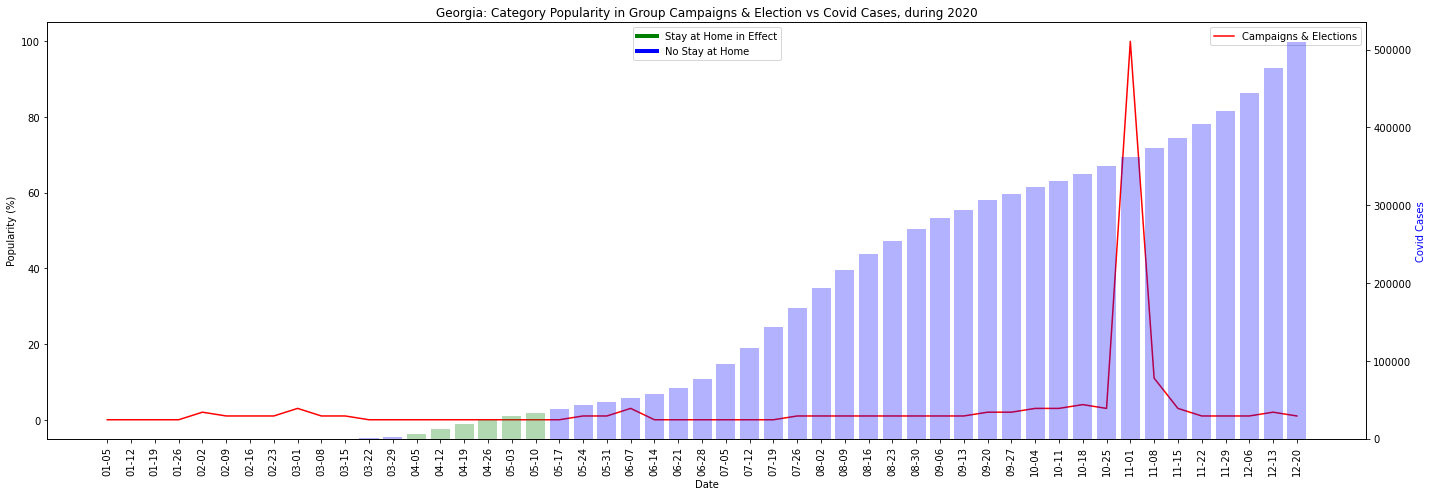

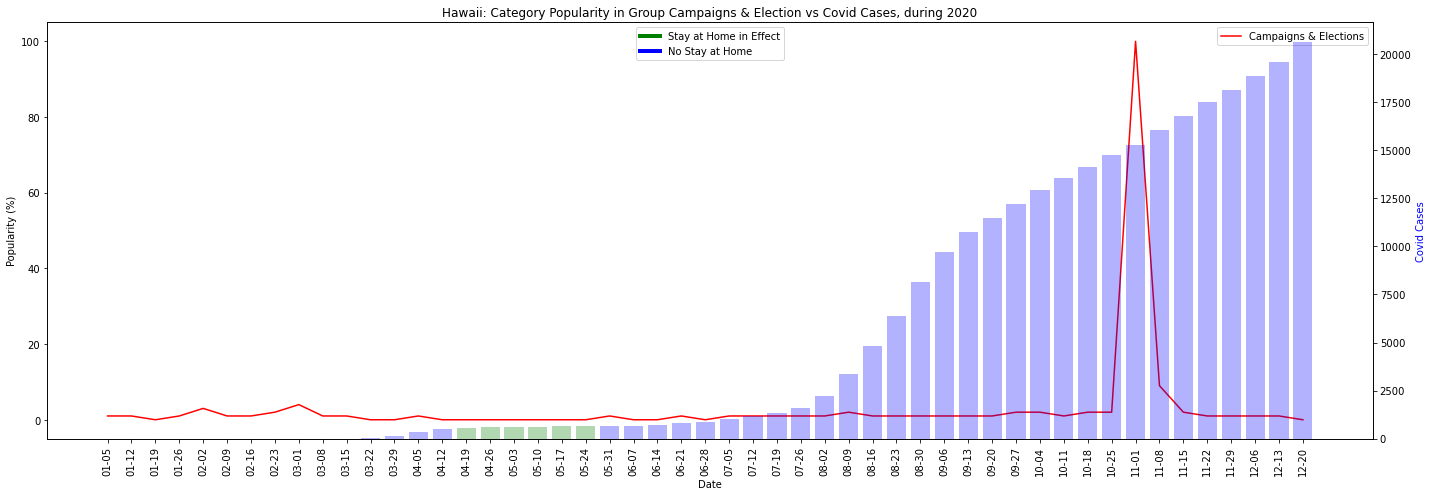

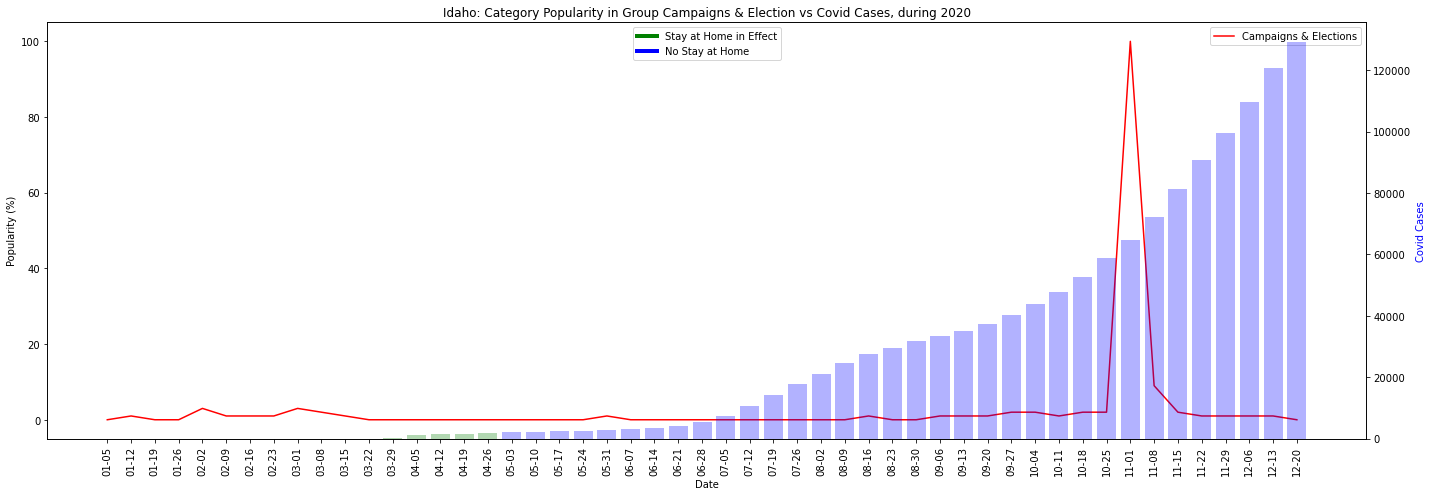

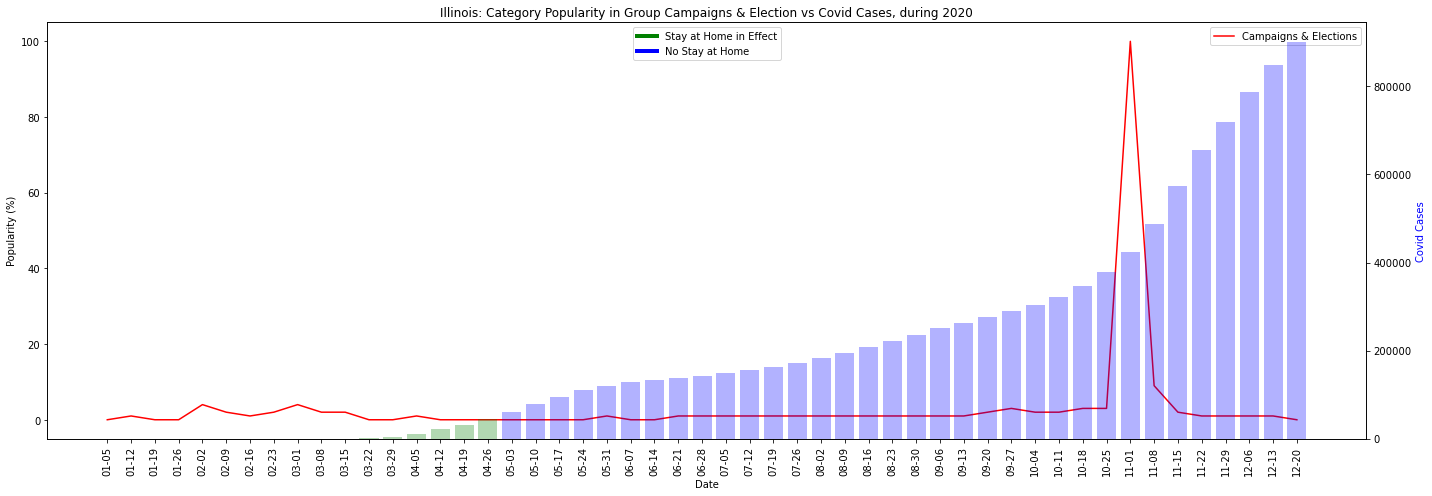

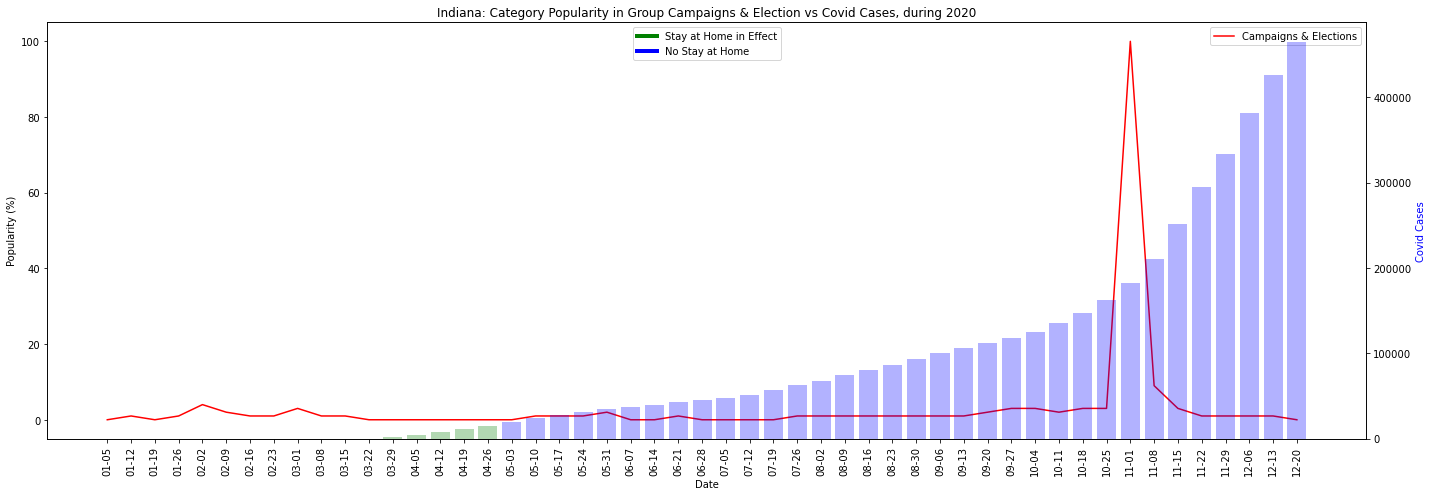

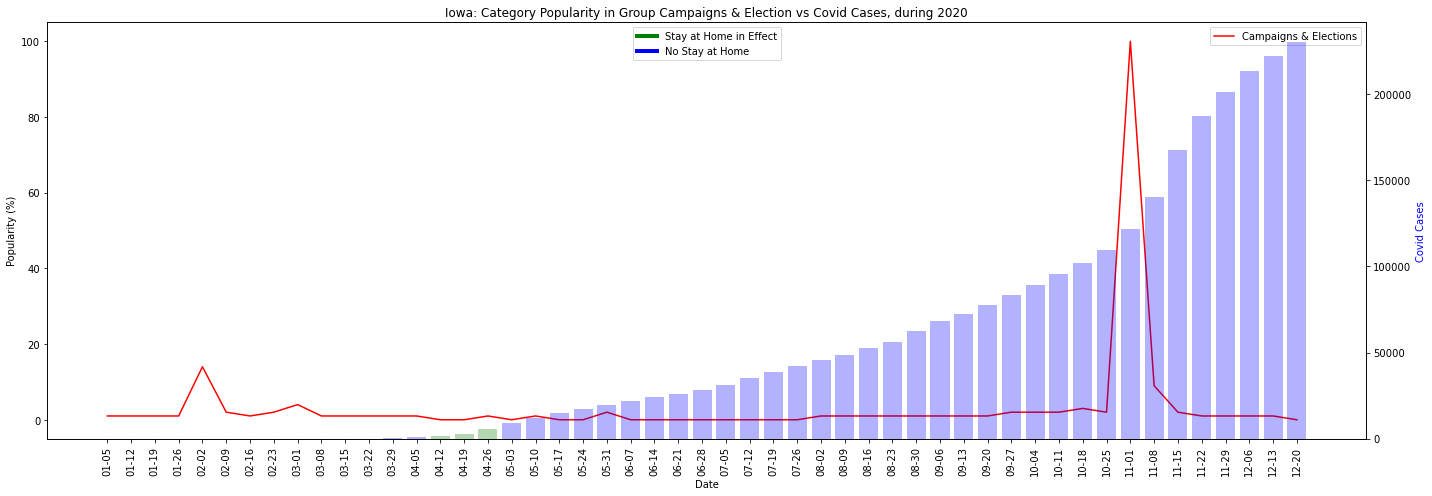

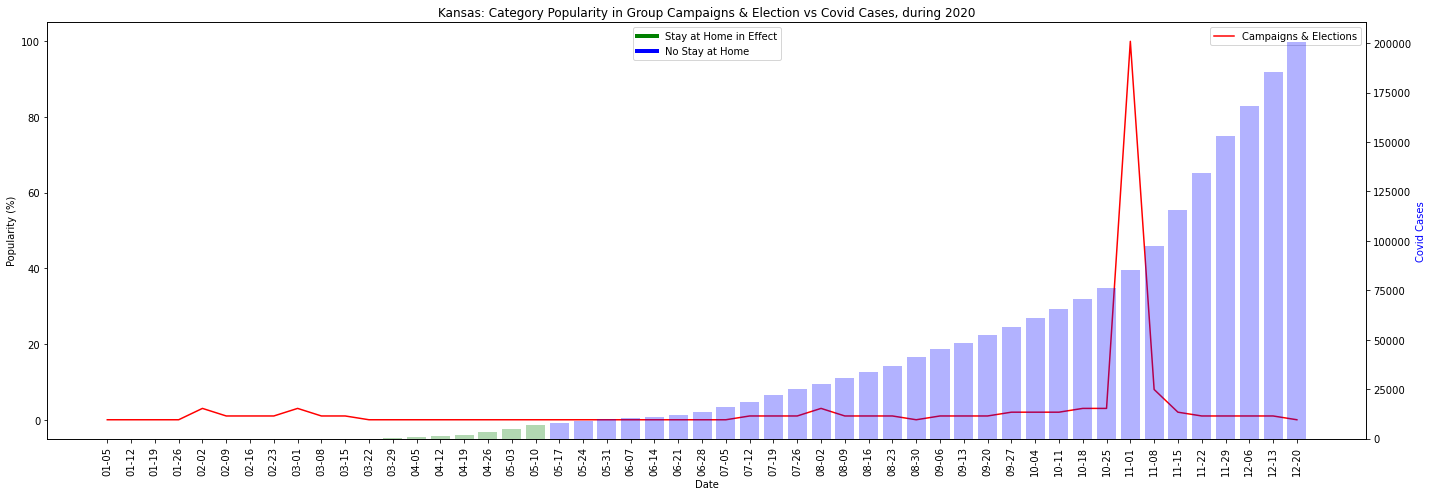

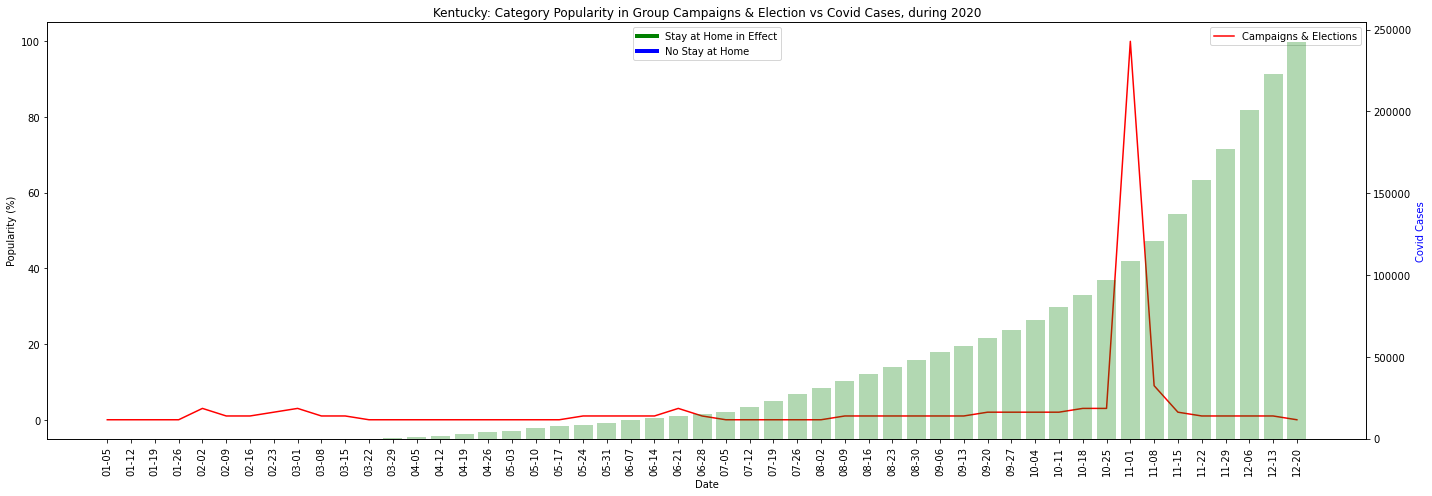

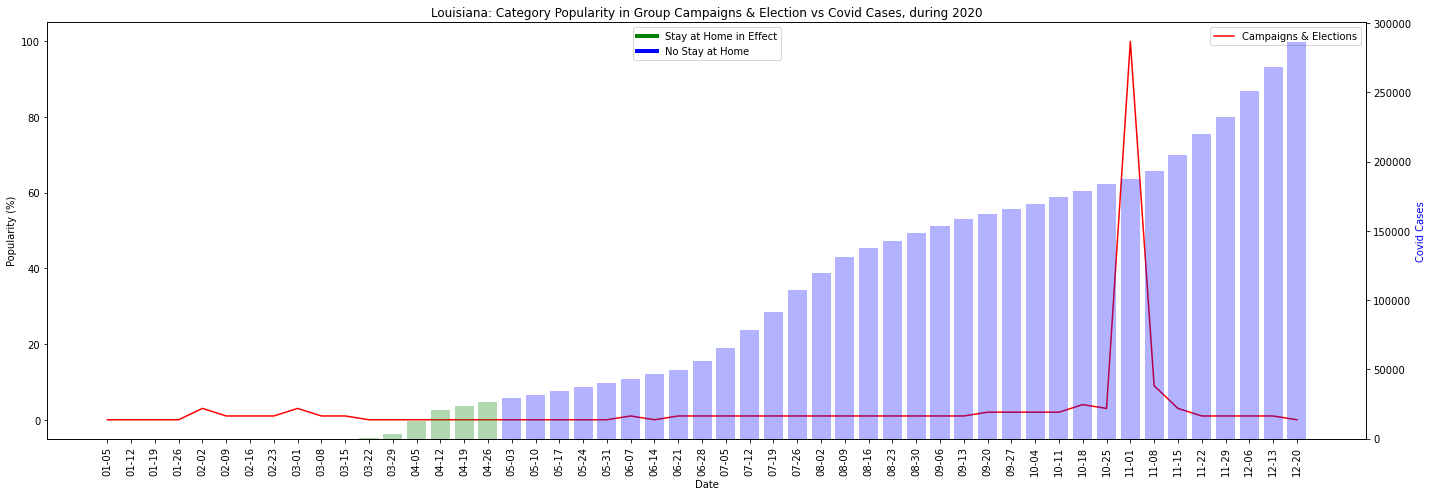

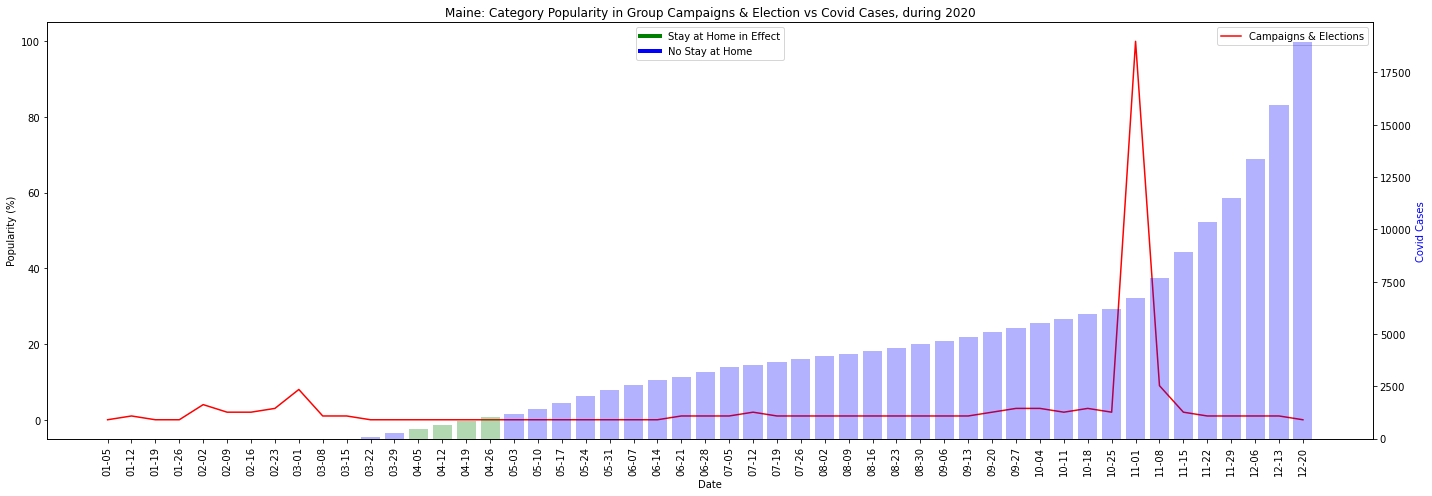

In [22]:
for x in range(10, 20):
    election_graph_maker(x)

In [23]:
def discrim_law_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['discrimination'], color='mediumslateblue', label='Discrimination')

    ax.plot(graphs_time_list, data_2020_df['law_enf'], color='deeppink', label='Law Enforcement')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Discrimination/Law Enforcement vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_DiscriminationLaw/{state_names[ind_no]}.png') 
    
    plt.show()

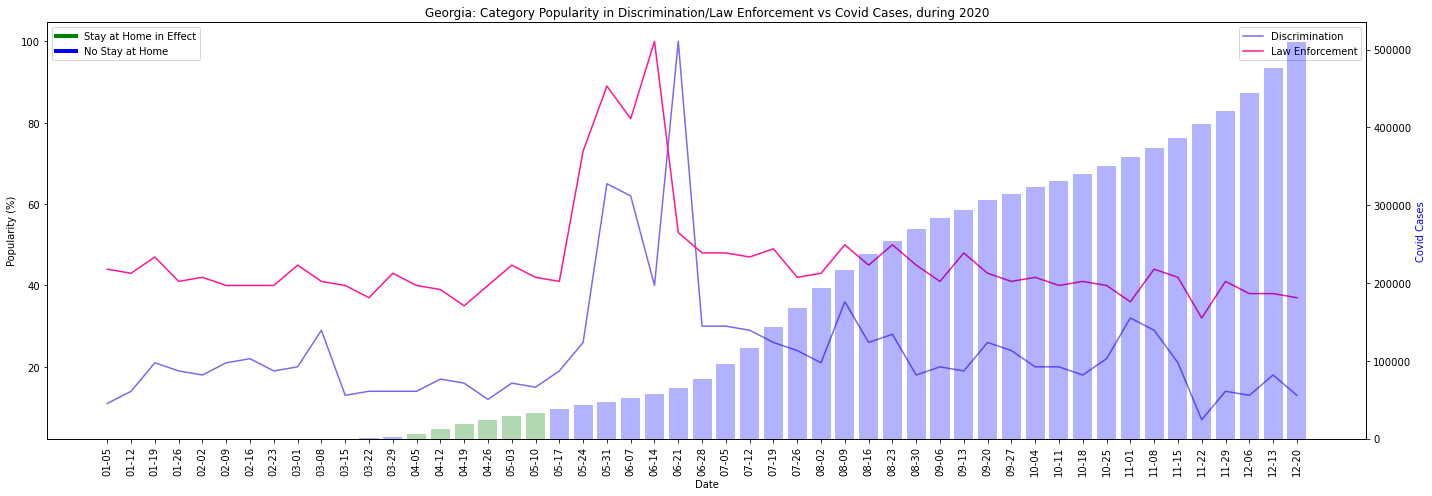

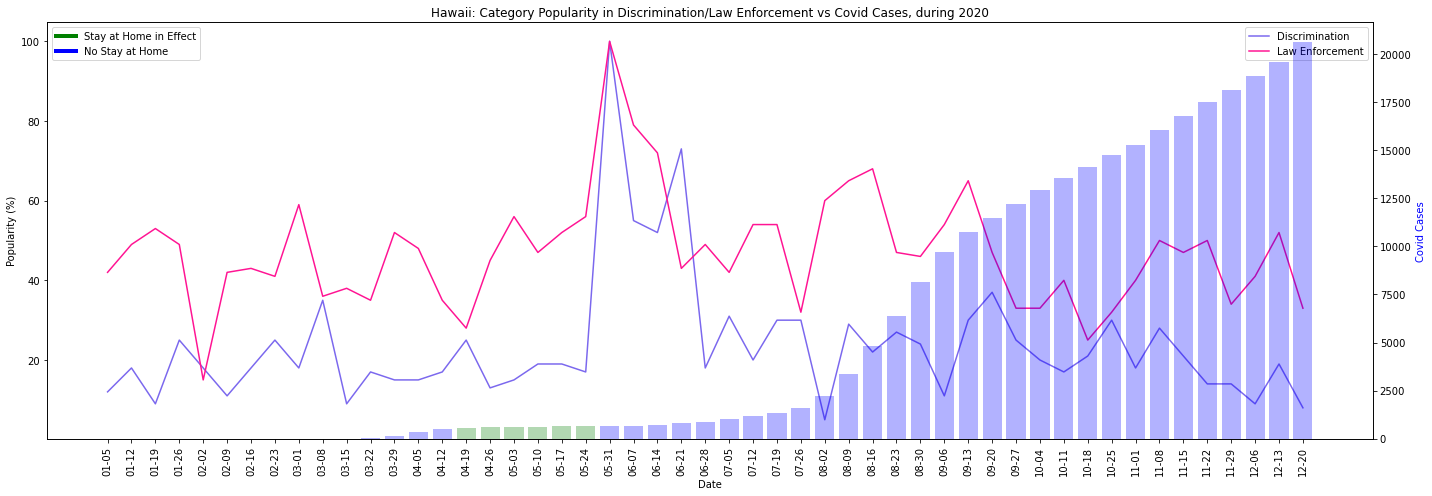

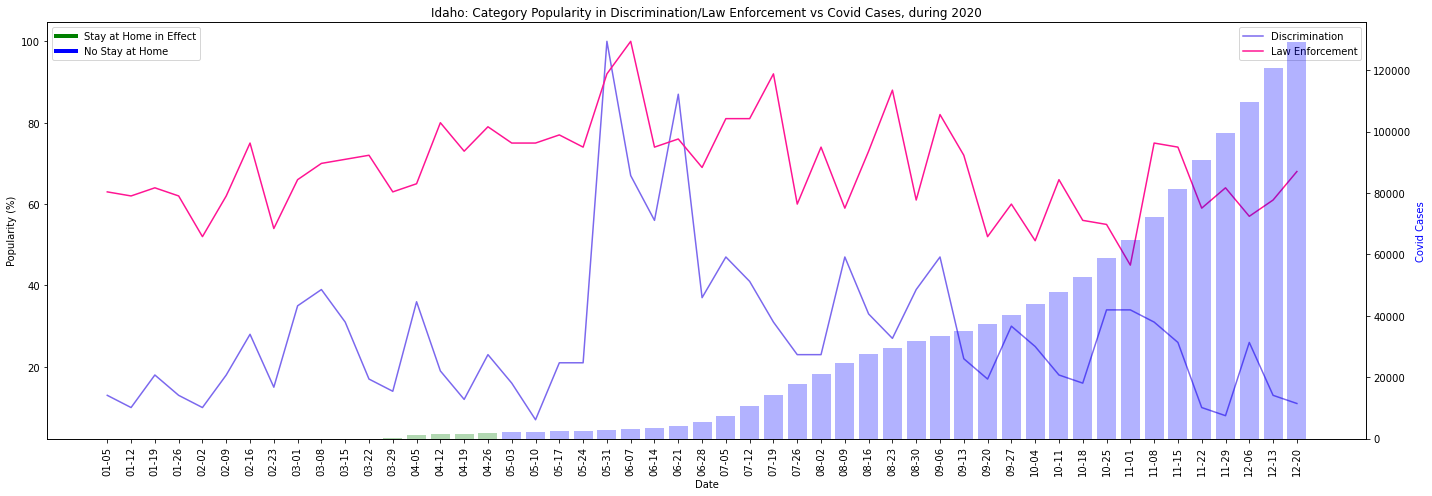

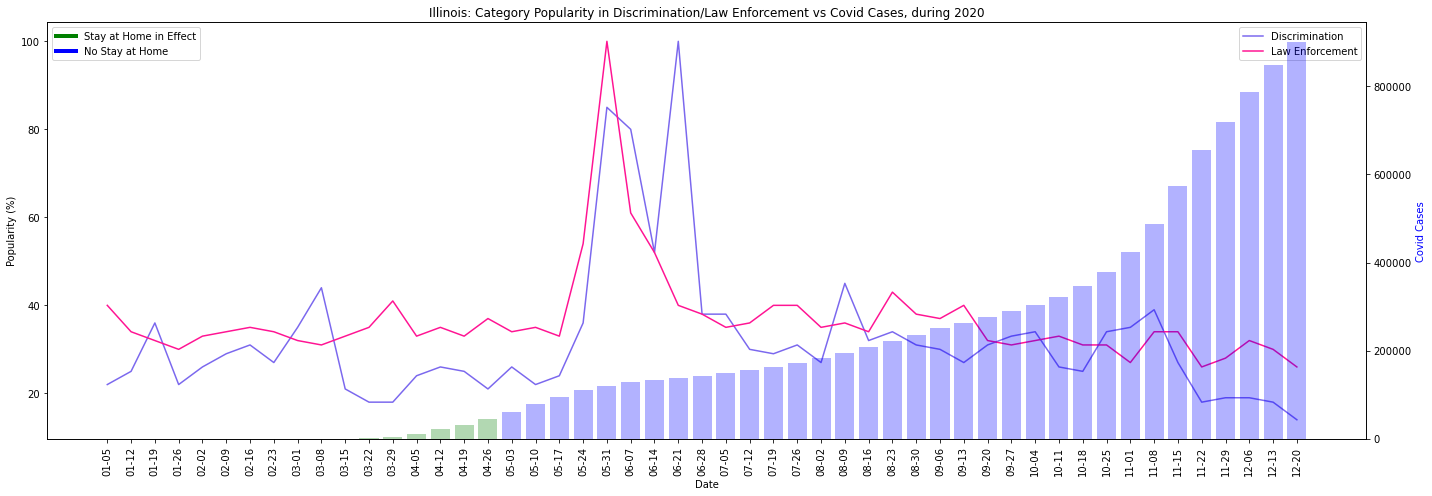

In [ ]:
for x in range(10, 20):
    discrim_law_graph_maker(x)

In [ ]:
def misc_full_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))
    
    ax.plot(graphs_time_list, data_2020_df['discrimination'], color='purple', label='Discrimination')

    ax.plot(graphs_time_list, data_2020_df['law_enf'], color='green', label='Law Enforcement')

    ax.plot(graphs_time_list, data_2020_df['weather'], color='red', label='Weather')

    ax.plot(graphs_time_list, data_2020_df['autos'], color='orange', label='Autos')

    ax.plot(graphs_time_list, data_2020_df['beauty_fitness'], color='brown', label='Beauty & Fitness')

    ax.plot(graphs_time_list, data_2020_df['sport_news'], color='cyan', label='Sports News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Miscellaneous (larger) vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_Misc/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in range(10, 20):
    misc_full_graph_maker(x)

In [ ]:
def misc_select_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))
    
    ax.plot(graphs_time_list, data_2020_df['weather'], color='red', label='Weather')

    ax.plot(graphs_time_list, data_2020_df['autos'], color='lime', label='Autos')

    ax.plot(graphs_time_list, data_2020_df['beauty_fitness'], color='fuchsia', label='Beauty & Fitness')

    ax.plot(graphs_time_list, data_2020_df['sport_news'], color='cyan', label='Sports News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Miscellaneous vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='lower left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../analysis_visualization/2020_bar_graphs/Popularity_SelectedMisc/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in range(10, 20):
    misc_select_graph_maker(x)